# EDA Analysis of Raw NBA DATA

In [3]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 500)

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path  #for Windows/Linux compatibility
DATAPATH = Path(r'../data')


## Data
 - games_details.csv .. (each-game player stats for everyone on the roster)
 - games.csv .......... (each-game team stats: final scores, points scored, field-goal & free-throw percentages, etc...)
 - players.csv ........ (index of players' names and teams)
 - ranking.csv ........ (incremental daily record of standings, games played, won, lost, win%, home record, road record)
 - teams.csv .......... (index of team info such as city and arena names and also head coach) 

## games.csv

In [4]:
TARGET = 'HOME_TEAM_WINS'
games = pd.read_csv(DATAPATH / "interim" / "games.csv")
games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1.610613e+09,126.0,0.484,0.926,0.382,25.0,46.0,1.610613e+09,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1.610613e+09,120.0,0.488,0.952,0.457,16.0,40.0,1.610613e+09,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1.610613e+09,114.0,0.482,0.786,0.313,22.0,37.0,1.610613e+09,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,1.610613e+09,113.0,0.441,0.909,0.297,27.0,49.0,1.610613e+09,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,1.610613e+09,108.0,0.429,1.000,0.378,22.0,47.0,1.610613e+09,110.0,0.500,0.773,0.292,20.0,47.0,0


In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27493 entries, 0 to 27492
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     27493 non-null  object 
 1   GAME_ID           27493 non-null  int64  
 2   GAME_STATUS_TEXT  26651 non-null  object 
 3   HOME_TEAM_ID      27493 non-null  int64  
 4   VISITOR_TEAM_ID   27493 non-null  int64  
 5   SEASON            27493 non-null  int64  
 6   TEAM_ID_home      26651 non-null  float64
 7   PTS_home          27394 non-null  float64
 8   FG_PCT_home       27394 non-null  float64
 9   FT_PCT_home       27394 non-null  float64
 10  FG3_PCT_home      27394 non-null  float64
 11  AST_home          27394 non-null  float64
 12  REB_home          27394 non-null  float64
 13  TEAM_ID_away      26651 non-null  float64
 14  PTS_away          27394 non-null  float64
 15  FG_PCT_away       27394 non-null  float64
 16  FT_PCT_away       27394 non-null  float6

###
### Check for duplicates and nulls

In [6]:
# duplicates
games.duplicated().sum()

0

In [7]:
#null values
games.isnull().sum()

GAME_DATE_EST         0
GAME_ID               0
GAME_STATUS_TEXT    842
HOME_TEAM_ID          0
VISITOR_TEAM_ID       0
SEASON                0
TEAM_ID_home        842
PTS_home             99
FG_PCT_home          99
FT_PCT_home          99
FG3_PCT_home         99
AST_home             99
REB_home             99
TEAM_ID_away        842
PTS_away             99
FG_PCT_away          99
FT_PCT_away          99
FG3_PCT_away         99
AST_away             99
REB_away             99
HOME_TEAM_WINS        0
dtype: int64

In [8]:
#show the nulls
games[games.isna().any(axis=1)]

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
19175,2003-10-24,10300116,Final,1610612753,1610612762,2003,1.610613e+09,NaN,NaN,NaN,NaN,NaN,NaN,1.610613e+09,NaN,NaN,NaN,NaN,NaN,NaN,0
19176,2003-10-24,10300108,Final,1610612737,1610612764,2003,1.610613e+09,NaN,NaN,NaN,NaN,NaN,NaN,1.610613e+09,NaN,NaN,NaN,NaN,NaN,NaN,0
19177,2003-10-24,10300109,Final,1610612738,1610612751,2003,1.610613e+09,NaN,NaN,NaN,NaN,NaN,NaN,1.610613e+09,NaN,NaN,NaN,NaN,NaN,NaN,0
19178,2003-10-24,10300113,Final,1610612759,1610612745,2003,1.610613e+09,NaN,NaN,NaN,NaN,NaN,NaN,1.610613e+09,NaN,NaN,NaN,NaN,NaN,NaN,0
19179,2003-10-24,10300112,Final,1610612749,1610612765,2003,1.610613e+09,NaN,NaN,NaN,NaN,NaN,NaN,1.610613e+09,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27488,2023-04-16 00:00:00,42200101,NaN,1610612749,1610612748,2022,NaN,117.0,49.5,72.7,24.4,29.0,38.0,NaN,130.0,59.5,71.4,60.0,32.0,36.0,0
27489,2023-04-15 00:00:00,42200131,NaN,1610612739,1610612752,2022,NaN,97.0,43.4,71.4,32.3,20.0,38.0,NaN,101.0,42.0,86.4,27.6,18.0,51.0,0
27490,2023-04-15 00:00:00,42200111,NaN,1610612738,1610612737,2022,NaN,112.0,47.7,83.3,39.4,25.0,58.0,NaN,99.0,38.8,81.8,17.2,23.0,45.0,1
27491,2023-04-15 00:00:00,42200121,NaN,1610612755,1610612751,2022,NaN,121.0,47.2,100.0,48.8,32.0,38.0,NaN,101.0,55.7,66.7,44.8,23.0,35.0,1


NOTE - 99 games from the early part of 2003 season missing data. 

NOTE - GAME_ID format: 

- 1st digit: 1=pre-season, 2=regular season, >2 = post season,  
- 2nd & 3rd digit: last two digits of season year (eg 103######## represents preseason game in 2003)

###
### Check distribution of missing games
Make sure these are fairly evenly distributed in case we decide to just delete them.

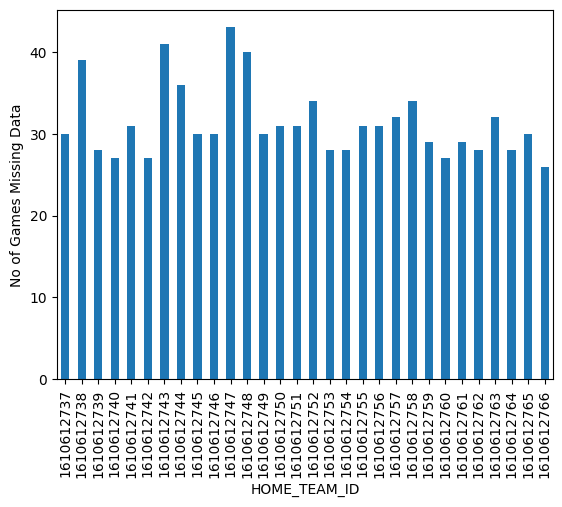

In [9]:
# check distribution of missing games 
df_home = games[games.isna().any(axis=1)].groupby(['HOME_TEAM_ID'])['HOME_TEAM_ID'].count()
ax = df_home.plot.bar(x='HOME_TEAM_ID', y='count', rot=90, ylabel="No of Games Missing Data")

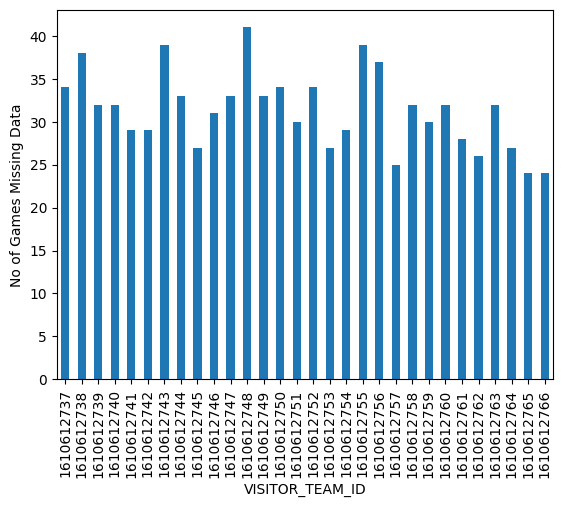

In [10]:
# check distribution of missing games 
df_visitor = games[games.isna().any(axis=1)].groupby(['VISITOR_TEAM_ID'])['VISITOR_TEAM_ID'].count()
ax = df_visitor.plot.bar(x='VISITOR_TEAM_ID', y='count', rot=90, ylabel="No of Games Missing Data")

<Axes: xlabel='HOME_TEAM_ID', ylabel='No of Games Missing Data'>

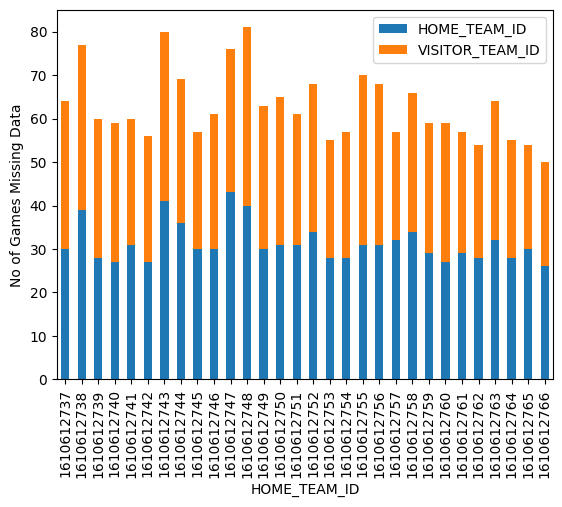

In [11]:
df = pd.merge(df_home, df_visitor, right_index = True, left_index = True)
df.plot.bar(stacked = True, ylabel="No of Games Missing Data")

###
### Verify okay to drop certain fields
 - Confirm that GAMES_STATUS_TEXT always = "Final"
 - Confirm that HOME_TEAM_ID always = TEAM_ID-home
 - Confirm that VISITOR_TEAM_ID always = TEAM_ID-away

In [12]:
#count all games not Final

games[games['GAME_STATUS_TEXT'] != 'Final'].shape[0]

842

NOTE - All games in dataset are Final. This field is not needed for modeling.

In [13]:
#check if fields are redundant

games[games['HOME_TEAM_ID'] != games['TEAM_ID_home']].shape[0]

842

In [14]:
#check if fields are redundant

games[games['VISITOR_TEAM_ID'] != games['TEAM_ID_away']].shape[0]

842

NOTE - for some reason Home and Visitor teams IDs are included twice, but are always the same

In [15]:
#these fields not needed for processing, analysis, or modeling

drop_fields = ['GAME_STATUS_TEXT', 'TEAM_ID_home', 'TEAM_ID_away']

games = games.drop(drop_fields,axis=1)

###
### Describe the data


In [16]:
games['GAME_DATE_EST'].str.split(" ").str[0]

0        2022-12-22
1        2022-12-22
2        2022-12-21
3        2022-12-21
4        2022-12-21
            ...    
27488    2023-04-16
27489    2023-04-15
27490    2023-04-15
27491    2023-04-15
27492    2023-04-15
Name: GAME_DATE_EST, Length: 27493, dtype: object

In [17]:
# fix data types first

games['GAME_DATE_EST'] = pd.to_datetime(games['GAME_DATE_EST'].str.split(" ").str[0])

category_fields = ['HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'SEASON']

for cat in category_fields:
    games[cat] = games[cat].astype('category')

In [18]:
games.describe(include = 'category').T

,count,unique,top,freq
HOME_TEAM_ID,27493,30,1610612747,1004
VISITOR_TEAM_ID,27493,30,1610612748,977
SEASON,27493,20,2005,1432


30 NBA teams and 19 seasons 

In [19]:
games.describe().T.applymap('{:,.4f}'.format)

,count,mean,min,25%,50%,75%,max,std
GAME_DATE_EST,"27,493.0000",",.4f",",.4f",",.4f",",.4f",",.4f",",.4f",nan
GAME_ID,"27,493.0000","21,836,177.1973","10,300,001.0000","20,700,221.0000","21,201,184.0000","21,800,678.0000","52,200,211.0000","5,617,390.3962"
PTS_home,"27,394.0000",103.8437,36.0000,95.0000,103.0000,113.0000,175.0000,13.4282
FG_PCT_home,"27,394.0000",1.9278,0.2500,0.4230,0.4620,0.5050,64.0000,8.2939
FT_PCT_home,"27,394.0000",3.1516,0.1430,0.7000,0.7690,0.8330,100.0000,13.5306
FG3_PCT_home,"27,394.0000",1.4728,0.0000,0.2860,0.3600,0.4350,63.6000,6.4560
AST_home,"27,394.0000",22.9090,6.0000,19.0000,23.0000,26.0000,50.0000,5.2078
REB_home,"27,394.0000",43.3846,15.0000,39.0000,43.0000,48.0000,72.0000,6.6334
PTS_away,"27,394.0000",101.0470,33.0000,92.0000,101.0000,110.0000,176.0000,13.5955
FG_PCT_away,"27,394.0000",1.8936,0.2440,0.4140,0.4510,0.4930,64.5000,8.1643


###
### Check anomalies
Some games seem to have a lot of points scored

In [20]:
# max points = 168?
games[(games['PTS_home'] > 160) | (games['PTS_away'] > 160) ]

,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
12610,2008-03-16,20700989,1610612743,1610612760,2007,168.0,0.604,0.857,0.516,44.0,51.0,116.0,0.430,0.688,0.200,28.0,45.0,1
14727,2006-12-07,20600271,1610612751,1610612756,2006,157.0,0.561,0.871,0.476,37.0,50.0,161.0,0.521,0.815,0.548,43.0,39.0,0
20030,2019-03-01,21800928,1610612737,1610612741,2018,161.0,0.496,0.680,0.367,33.0,59.0,168.0,0.471,0.729,0.438,30.0,62.0,0
26980,2023-02-24,22200902,1610612746,1610612758,2022,175.0,60.200,86.100,57.800,39.0,42.0,176.0,58.600,80.000,43.900,33.0,43.0,0


NOTE - Google search reveals that the 168 point games are overtime games

###
### Check Distributions


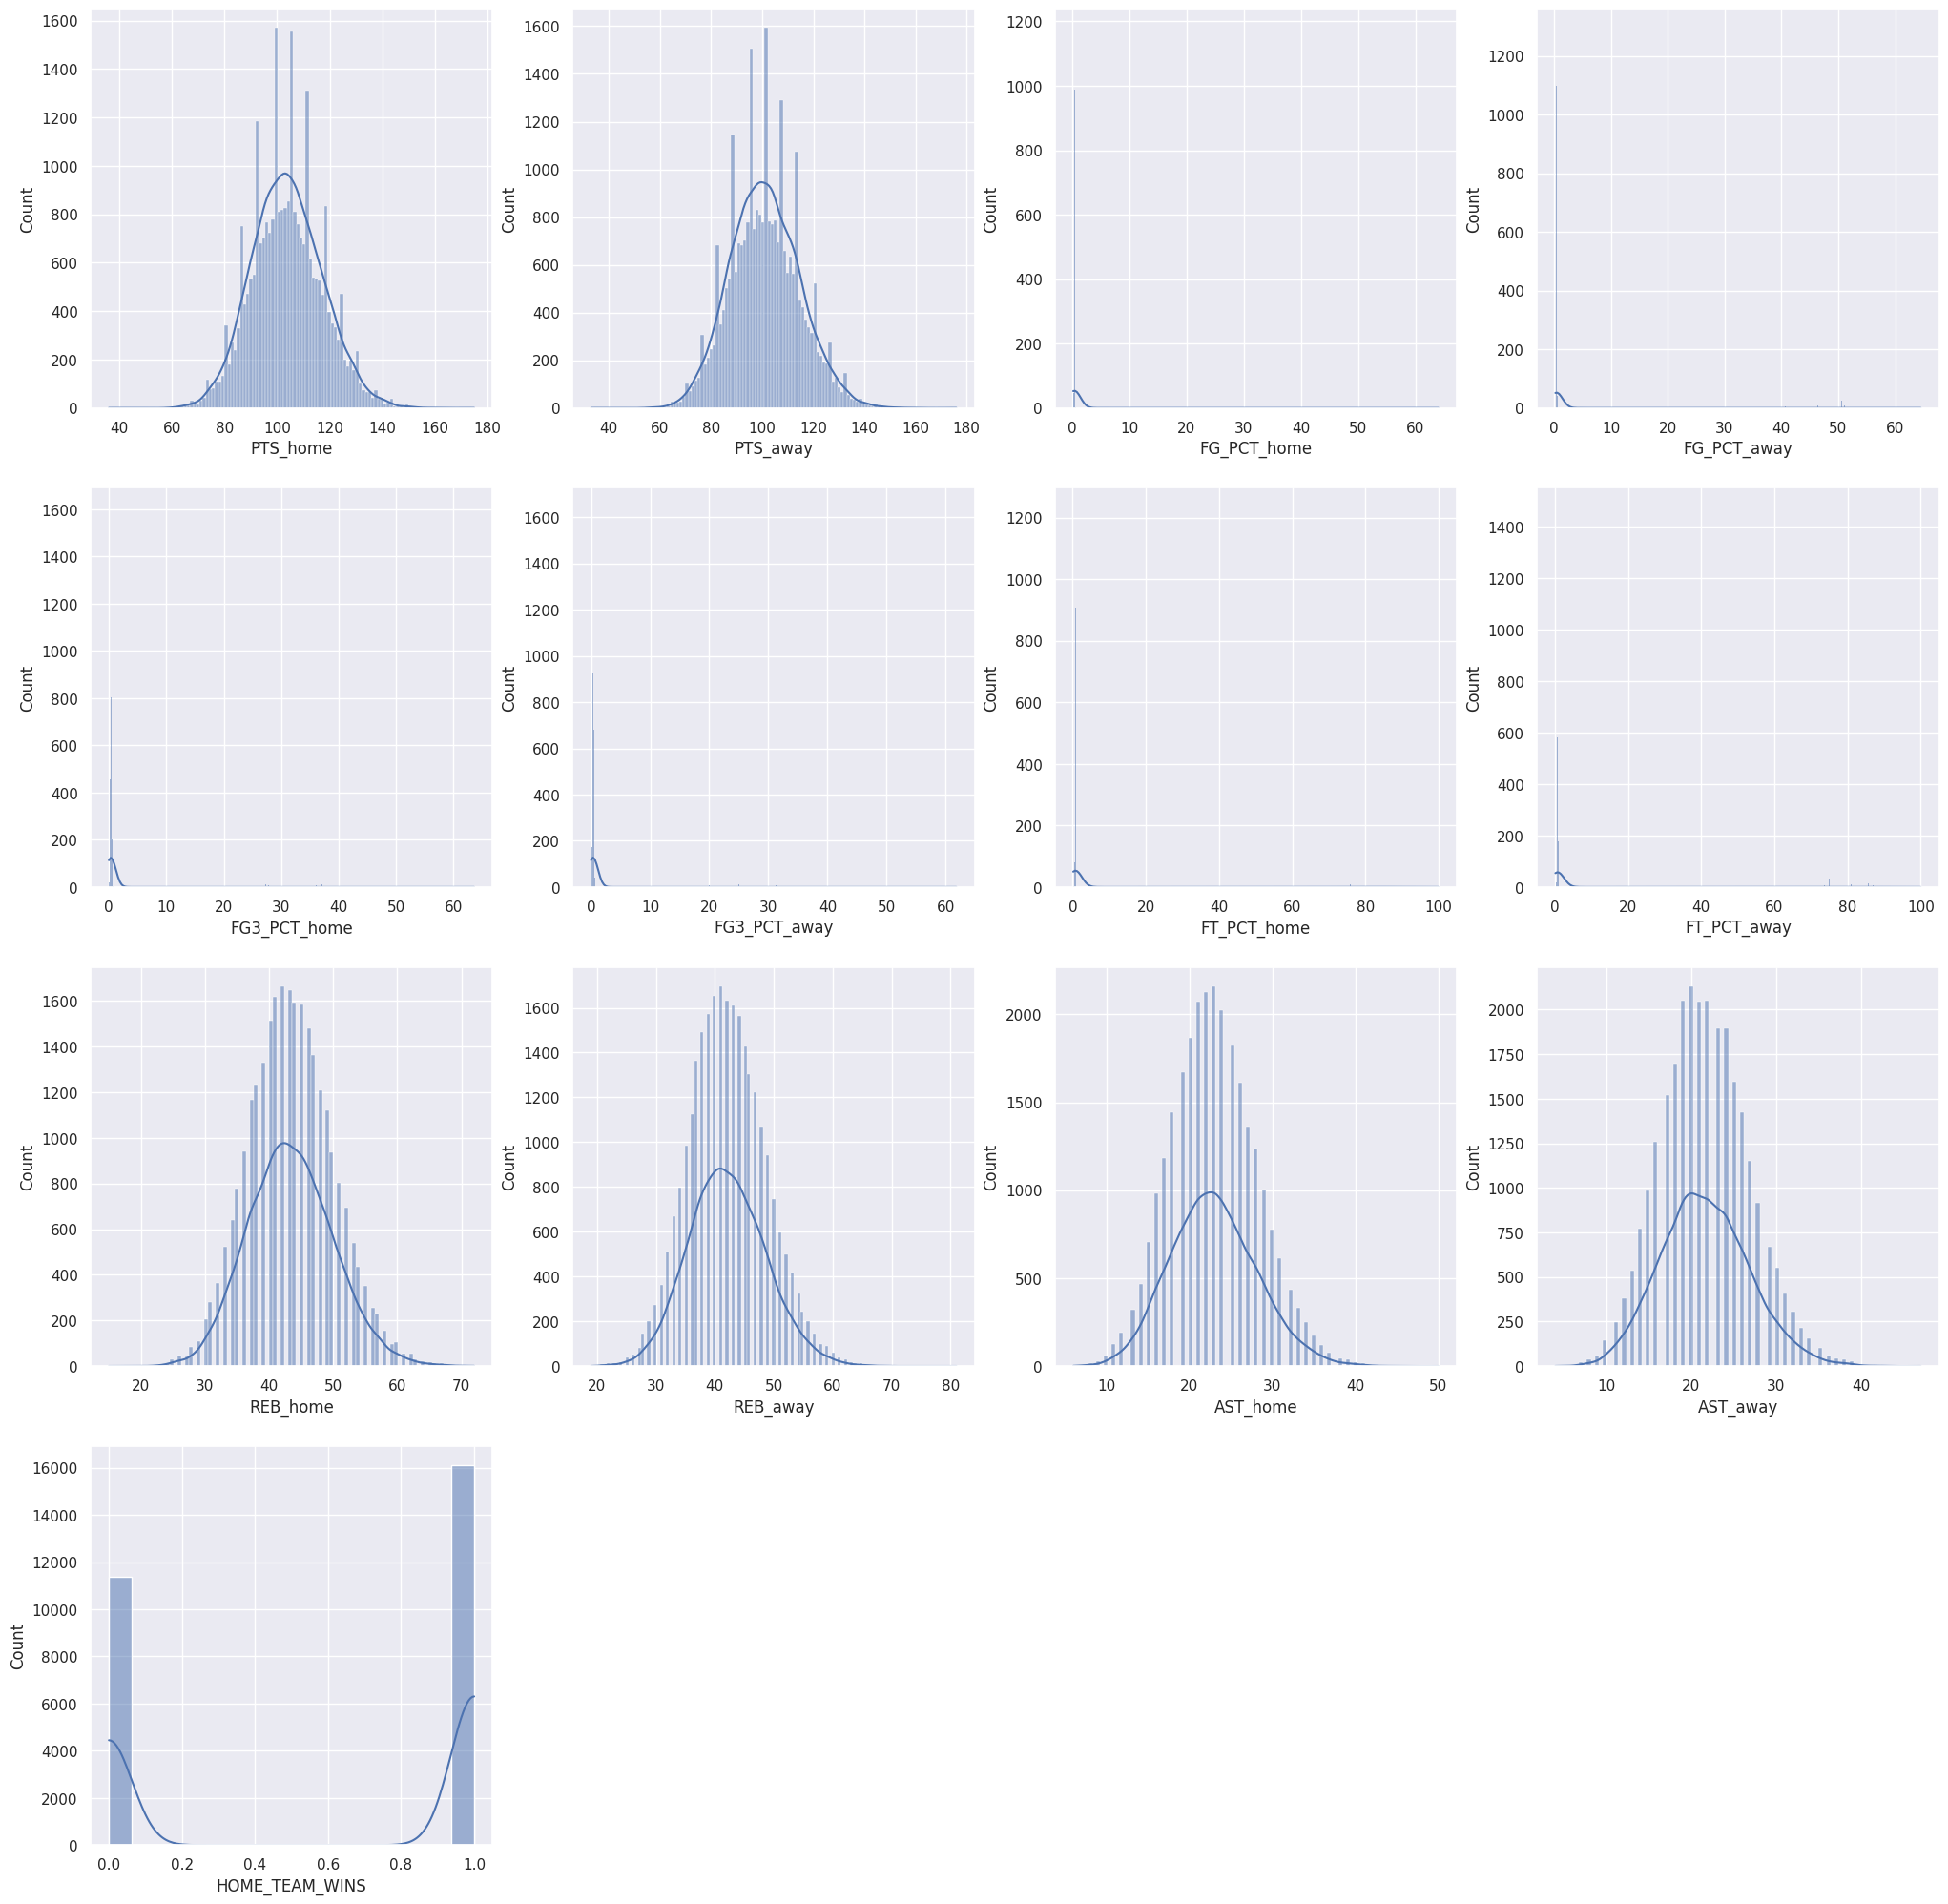

In [21]:
value_list = ['PTS_home', 'PTS_away', 
              'FG_PCT_home', 'FG_PCT_away', 
              'FG3_PCT_home', 'FG3_PCT_away',
              'FT_PCT_home', 'FT_PCT_away', 
              'REB_home', 'REB_away',
              'AST_home', 'AST_away', 
              'HOME_TEAM_WINS',
             ]

sns.set(rc={'figure.figsize':(25,25)})
for i, column in enumerate(value_list, 1):
    plt.subplot(4,4,i)
    p=sns.histplot(x=column, data=games, stat='count', kde=True)

###
### Group data to check season-by-season variation


In [16]:
# summarize data for each season to check season by season variation

value_list = ['GAME_ID', 'HOME_TEAM_WINS', 'PTS_home', 'PTS_away', 
              'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home',
              'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away', 
             ]
agg_dict = {'GAME_ID': len, 'HOME_TEAM_WINS': np.sum, 'PTS_home': np.mean, 'PTS_away': np.mean,
           'FG_PCT_home': np.mean, 'FT_PCT_home': np.mean, 'FG3_PCT_home': np.mean, 'AST_home': np.mean, 'REB_home': np.mean,
           'FG_PCT_away': np.mean, 'FT_PCT_away': np.mean, 'FG3_PCT_away': np.mean, 'AST_away': np.mean, 'REB_away': np.mean,
           }

df = pd.pivot_table(games,index=['SEASON'],
                    values=value_list,
                    aggfunc=agg_dict,
                   )
df = df.reset_index()
df = df.rename(columns={'GAME_ID': 'GAMES_PLAYED',})

df['HOME_WIN_RATIO'] = df['HOME_TEAM_WINS'] / df['GAMES_PLAYED']

# move more interesting columns to front
column1 = df.pop('GAMES_PLAYED')
column2 = df.pop('HOME_TEAM_WINS')
column3 = df.pop('HOME_WIN_RATIO')
df.insert(1,'GAMES_PLAYED', column1)
df.insert(2,'HOME_TEAM_WINS', column2)
df.insert(3,'HOME_WIN_RATIO', column3)

df

,SEASON,GAMES_PLAYED,HOME_TEAM_WINS,HOME_WIN_RATIO,AST_away,AST_home,FG3_PCT_away,FG3_PCT_home,FG_PCT_away,FG_PCT_home,FT_PCT_away,FT_PCT_home,PTS_away,PTS_home,REB_away,REB_home
0,2003,1385,800,0.577617,20.262053,22.056765,0.330227,0.342993,0.431240,0.445108,0.750990,0.748642,91.092535,94.907465,41.241058,43.173406
1,2004,1362,824,0.604993,20.240088,21.928781,0.346637,0.354970,0.441678,0.454632,0.752280,0.756231,95.381791,98.604993,41.000000,42.533040
2,2005,1432,866,0.604749,19.689944,21.152235,0.355920,0.350063,0.448051,0.460089,0.742950,0.744709,95.172486,98.406425,39.972067,41.799581
3,2006,1419,839,0.591261,20.223397,22.004933,0.348088,0.353187,0.450718,0.462074,0.748125,0.748553,96.944327,99.849190,40.442565,41.609584
4,2007,1411,862,0.610914,20.579022,22.496811,0.352690,0.359906,0.448358,0.463230,0.752360,0.757163,97.549256,101.273565,41.146704,42.702339
5,2008,1425,857,0.601404,20.002105,21.588070,0.357941,0.363791,0.451627,0.463702,0.767012,0.766348,97.903860,100.922807,40.530526,41.960000
6,2009,1424,857,0.601826,20.259831,21.884831,0.350468,0.349756,0.456085,0.465970,0.754971,0.757674,98.745787,101.654494,41.030899,42.205758
7,2010,1422,871,0.612518,20.533052,21.976090,0.348895,0.355870,0.450444,0.463857,0.759762,0.763982,97.384669,100.756681,40.860759,41.908579
8,2011,1104,656,0.594203,20.115036,21.380435,0.338460,0.344514,0.441467,0.453630,0.751953,0.753493,94.429348,97.392210,41.421196,42.860507
9,2012,1420,872,0.614085,21.218310,22.605634,0.343558,0.363454,0.445188,0.458730,0.754877,0.749131,96.114085,99.381690,41.549296,42.756338


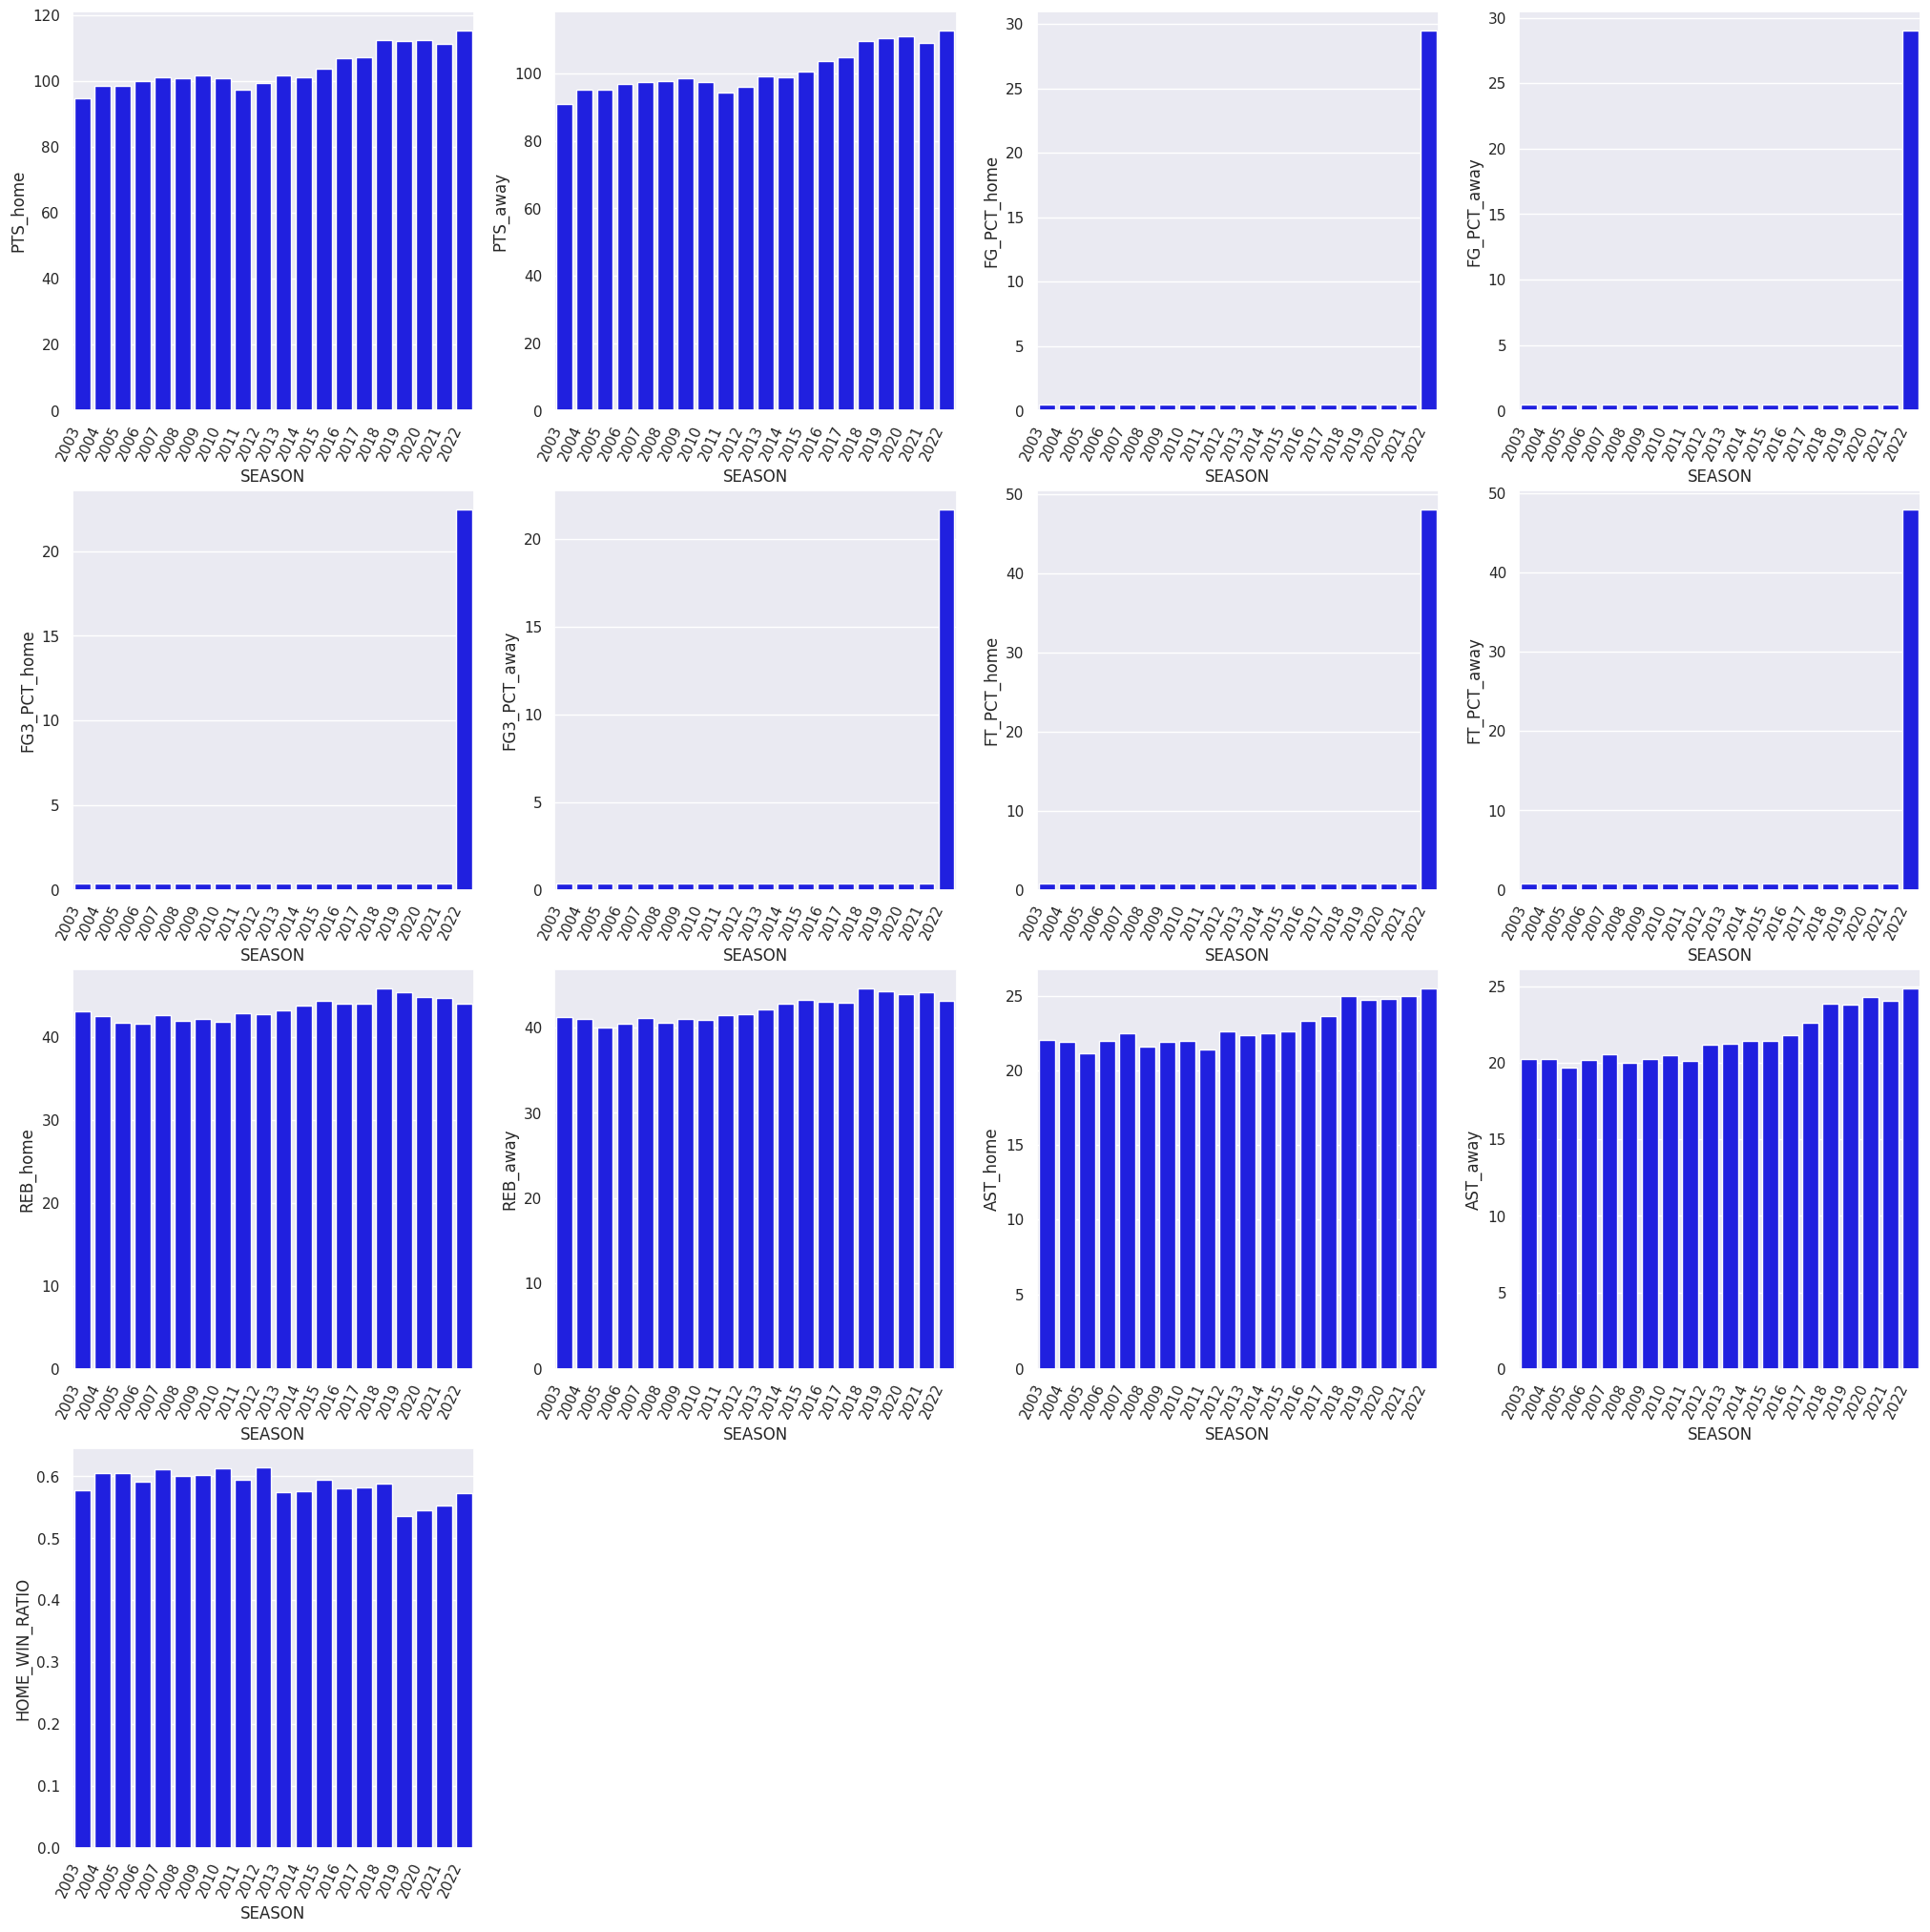

In [17]:
value_list = ['PTS_home', 'PTS_away', 
              'FG_PCT_home', 'FG_PCT_away', 
              'FG3_PCT_home', 'FG3_PCT_away',
              'FT_PCT_home', 'FT_PCT_away', 
              'REB_home', 'REB_away',
              'AST_home', 'AST_away', 
              'HOME_WIN_RATIO',
             ]
for i, column in enumerate(value_list, 1):
    plt.subplot(4,4,i)
    plt.xticks(rotation=65, horizontalalignment='right',)
    ax = sns.barplot(data=df, x='SEASON', y=column, color='blue')
 

NOTE - PTS, REB, AST have trended up the last several seasons, but Home win ratio is down

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SEASON,20.0,2012.500000,5.916080,2003.000000,2007.750000,2012.500000,2017.250000,2022.000000
GAMES_PLAYED,20.0,1374.650000,82.915477,1104.000000,1381.000000,1408.000000,1420.500000,1432.000000
HOME_TEAM_WINS,20.0,806.000000,66.051017,656.000000,798.500000,817.500000,857.000000,872.000000
HOME_WIN_RATIO,20.0,0.585824,0.021982,0.536664,0.575077,0.589535,0.602557,0.614085
AST_away,20.0,21.628862,1.674119,19.689944,20.254896,21.225133,22.930277,24.861272
AST_home,20.0,22.919538,1.356535,21.152235,21.964263,22.503342,23.903620,25.479769
FG3_PCT_away,20.0,1.416017,4.769985,0.330227,0.345916,0.350358,0.355364,21.681415
FG3_PCT_home,20.0,1.461164,4.942785,0.342993,0.352406,0.356019,0.361565,22.460712
FG_PCT_away,20.0,1.878676,6.391792,0.431240,0.445353,0.450564,0.455273,29.034374
FG_PCT_home,20.0,1.912561,6.494332,0.445108,0.458051,0.463137,0.464478,29.503908


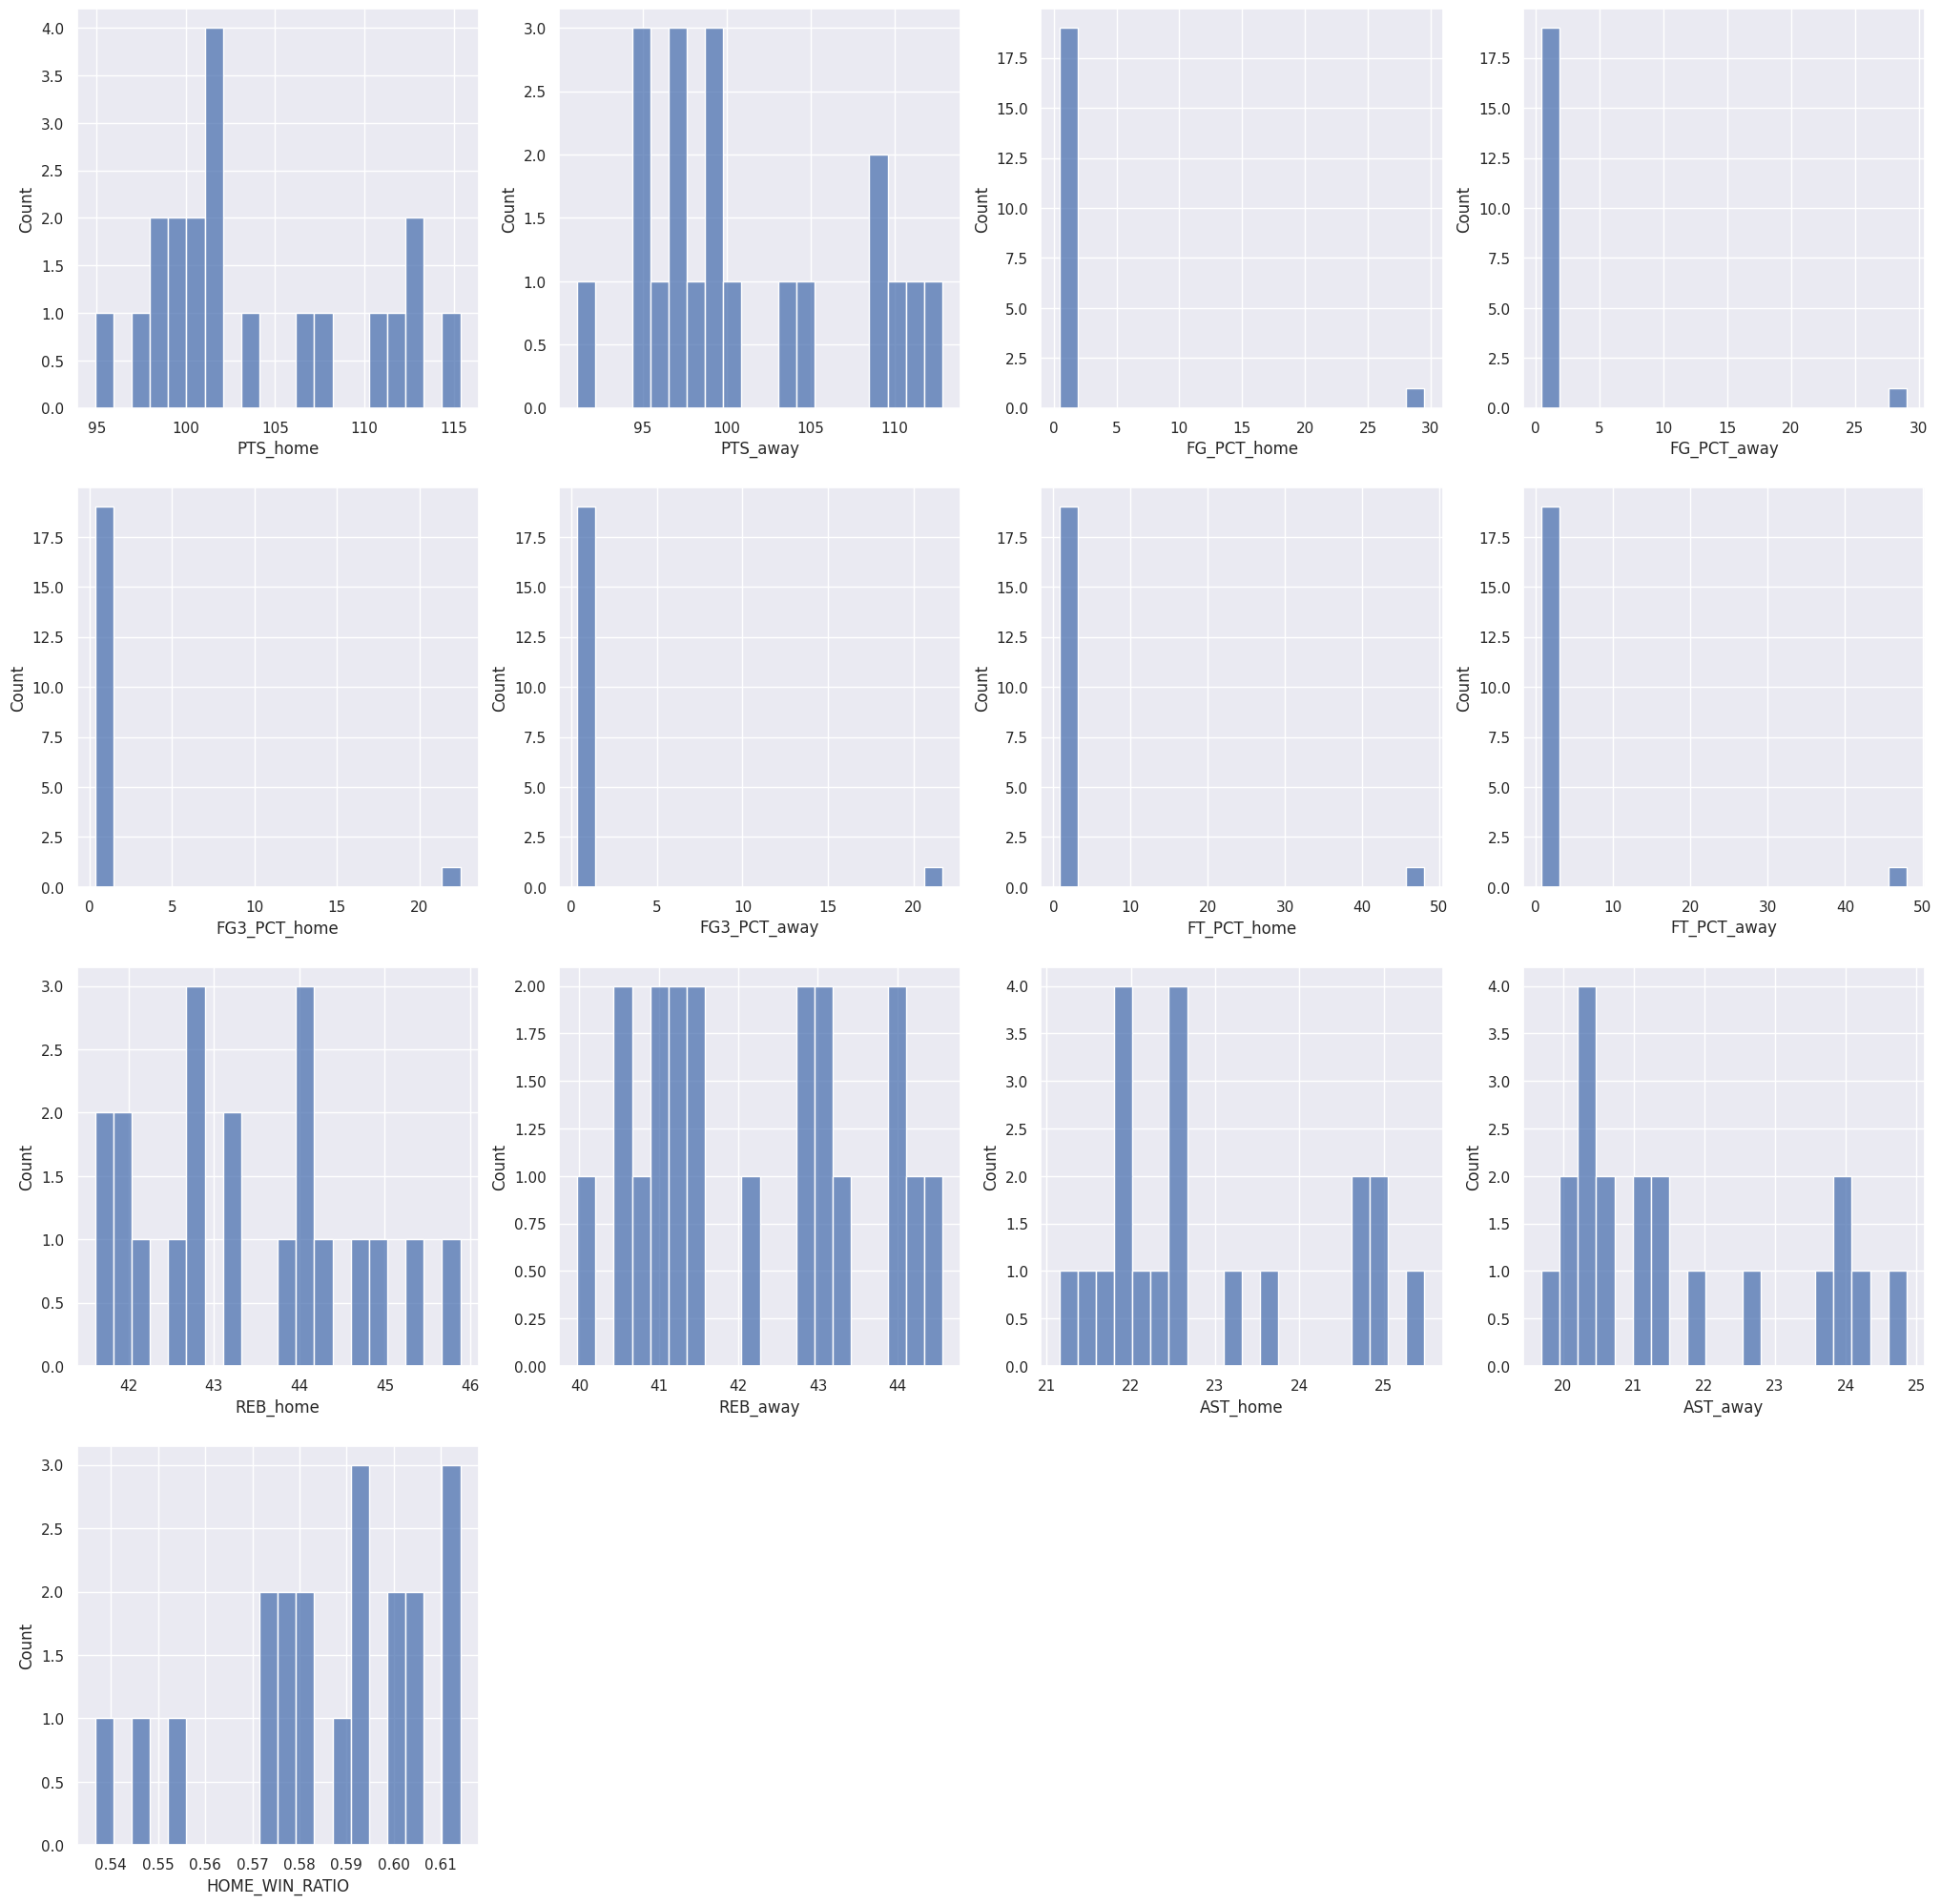

In [19]:
value_list = ['PTS_home', 'PTS_away', 
              'FG_PCT_home', 'FG_PCT_away', 
              'FG3_PCT_home', 'FG3_PCT_away',
              'FT_PCT_home', 'FT_PCT_away', 
              'REB_home', 'REB_away',
              'AST_home', 'AST_away', 
              'HOME_WIN_RATIO',
             ]

sns.set(rc={'figure.figsize':(25,25)})
for i, column in enumerate(value_list, 1):
    plt.subplot(4,4,i)
    p=sns.histplot(x=column, data=df, stat='count',bins = 20)

### 
### Group to check team-by-team variation for one season

In [22]:
# summarize data for each team during 2021 to check team-by-team variation

games2021 = games[games['SEASON']==2021]

value_list = ['GAME_ID', 'HOME_TEAM_WINS', 'PTS_home', 'PTS_away', 
              'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home',
              'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away', 
             ]
agg_dict = {'GAME_ID': len, 'HOME_TEAM_WINS': np.sum, 'PTS_home': np.mean, 'PTS_away': np.mean,
           'FG_PCT_home': np.mean, 'FT_PCT_home': np.mean, 'FG3_PCT_home': np.mean, 'AST_home': np.mean, 'REB_home': np.mean,
           'FG_PCT_away': np.mean, 'FT_PCT_away': np.mean, 'FG3_PCT_away': np.mean, 'AST_away': np.mean, 'REB_away': np.mean,
           }

df = pd.pivot_table(games2021,index=['HOME_TEAM_ID'],
                    values=value_list,
                    aggfunc=agg_dict,
                   )

df = df.reset_index()
df = df.rename(columns={'GAME_ID': 'GAMES_PLAYED',})

df['HOME_WIN_RATIO'] = df['HOME_TEAM_WINS'] / df['GAMES_PLAYED']

# move more interesting columns to front
column1 = df.pop('GAMES_PLAYED')
column2 = df.pop('HOME_TEAM_WINS')
column3 = df.pop('HOME_WIN_RATIO')
df.insert(1,'GAMES_PLAYED', column1)
df.insert(2,'HOME_TEAM_WINS', column2)
df.insert(3,'HOME_WIN_RATIO', column3)

df

,HOME_TEAM_ID,GAMES_PLAYED,HOME_TEAM_WINS,HOME_WIN_RATIO,AST_away,AST_home,FG3_PCT_away,FG3_PCT_home,FG_PCT_away,FG_PCT_home,FT_PCT_away,FT_PCT_home,PTS_away,PTS_home,REB_away,REB_home
0,1610612737,46,30,0.652174,24.760870,25.326087,0.359935,0.383348,0.462848,0.480739,0.790196,0.811326,110.717391,115.978261,43.565217,43.804348
1,1610612738,55,36,0.654545,21.545455,24.509091,0.351855,0.356418,0.438709,0.460927,0.789655,0.817709,103.163636,109.200000,43.000000,45.254545
2,1610612739,44,25,0.568182,24.204545,25.386364,0.326045,0.357955,0.451432,0.467159,0.767068,0.745727,103.818182,107.568182,43.363636,44.181818
3,1610612740,46,22,0.478261,24.195652,25.543478,0.361283,0.335913,0.472283,0.468130,0.783500,0.792783,109.413043,111.326087,40.913043,45.521739
4,1610612741,46,30,0.652174,24.782609,24.760870,0.361630,0.369957,0.470239,0.480739,0.782239,0.806065,110.826087,113.652174,43.347826,44.239130
5,1610612742,51,37,0.725490,22.686275,23.098039,0.320431,0.355216,0.449529,0.458000,0.761059,0.755137,101.549020,108.372549,44.176471,42.960784
6,1610612743,44,24,0.545455,25.113636,28.204545,0.363045,0.356568,0.478523,0.483932,0.764068,0.798091,112.750000,114.931818,42.022727,43.931818
7,1610612744,56,45,0.803571,22.142857,28.196429,0.334286,0.376304,0.424643,0.477804,0.767214,0.775518,103.357143,113.785714,42.785714,46.410714
8,1610612745,43,12,0.279070,25.232558,24.558140,0.353256,0.361209,0.479535,0.460930,0.775047,0.718093,118.604651,112.093023,46.348837,41.651163
9,1610612746,45,26,0.577778,23.711111,23.977778,0.328067,0.375956,0.450778,0.459022,0.768378,0.795378,107.800000,109.022222,46.155556,44.755556


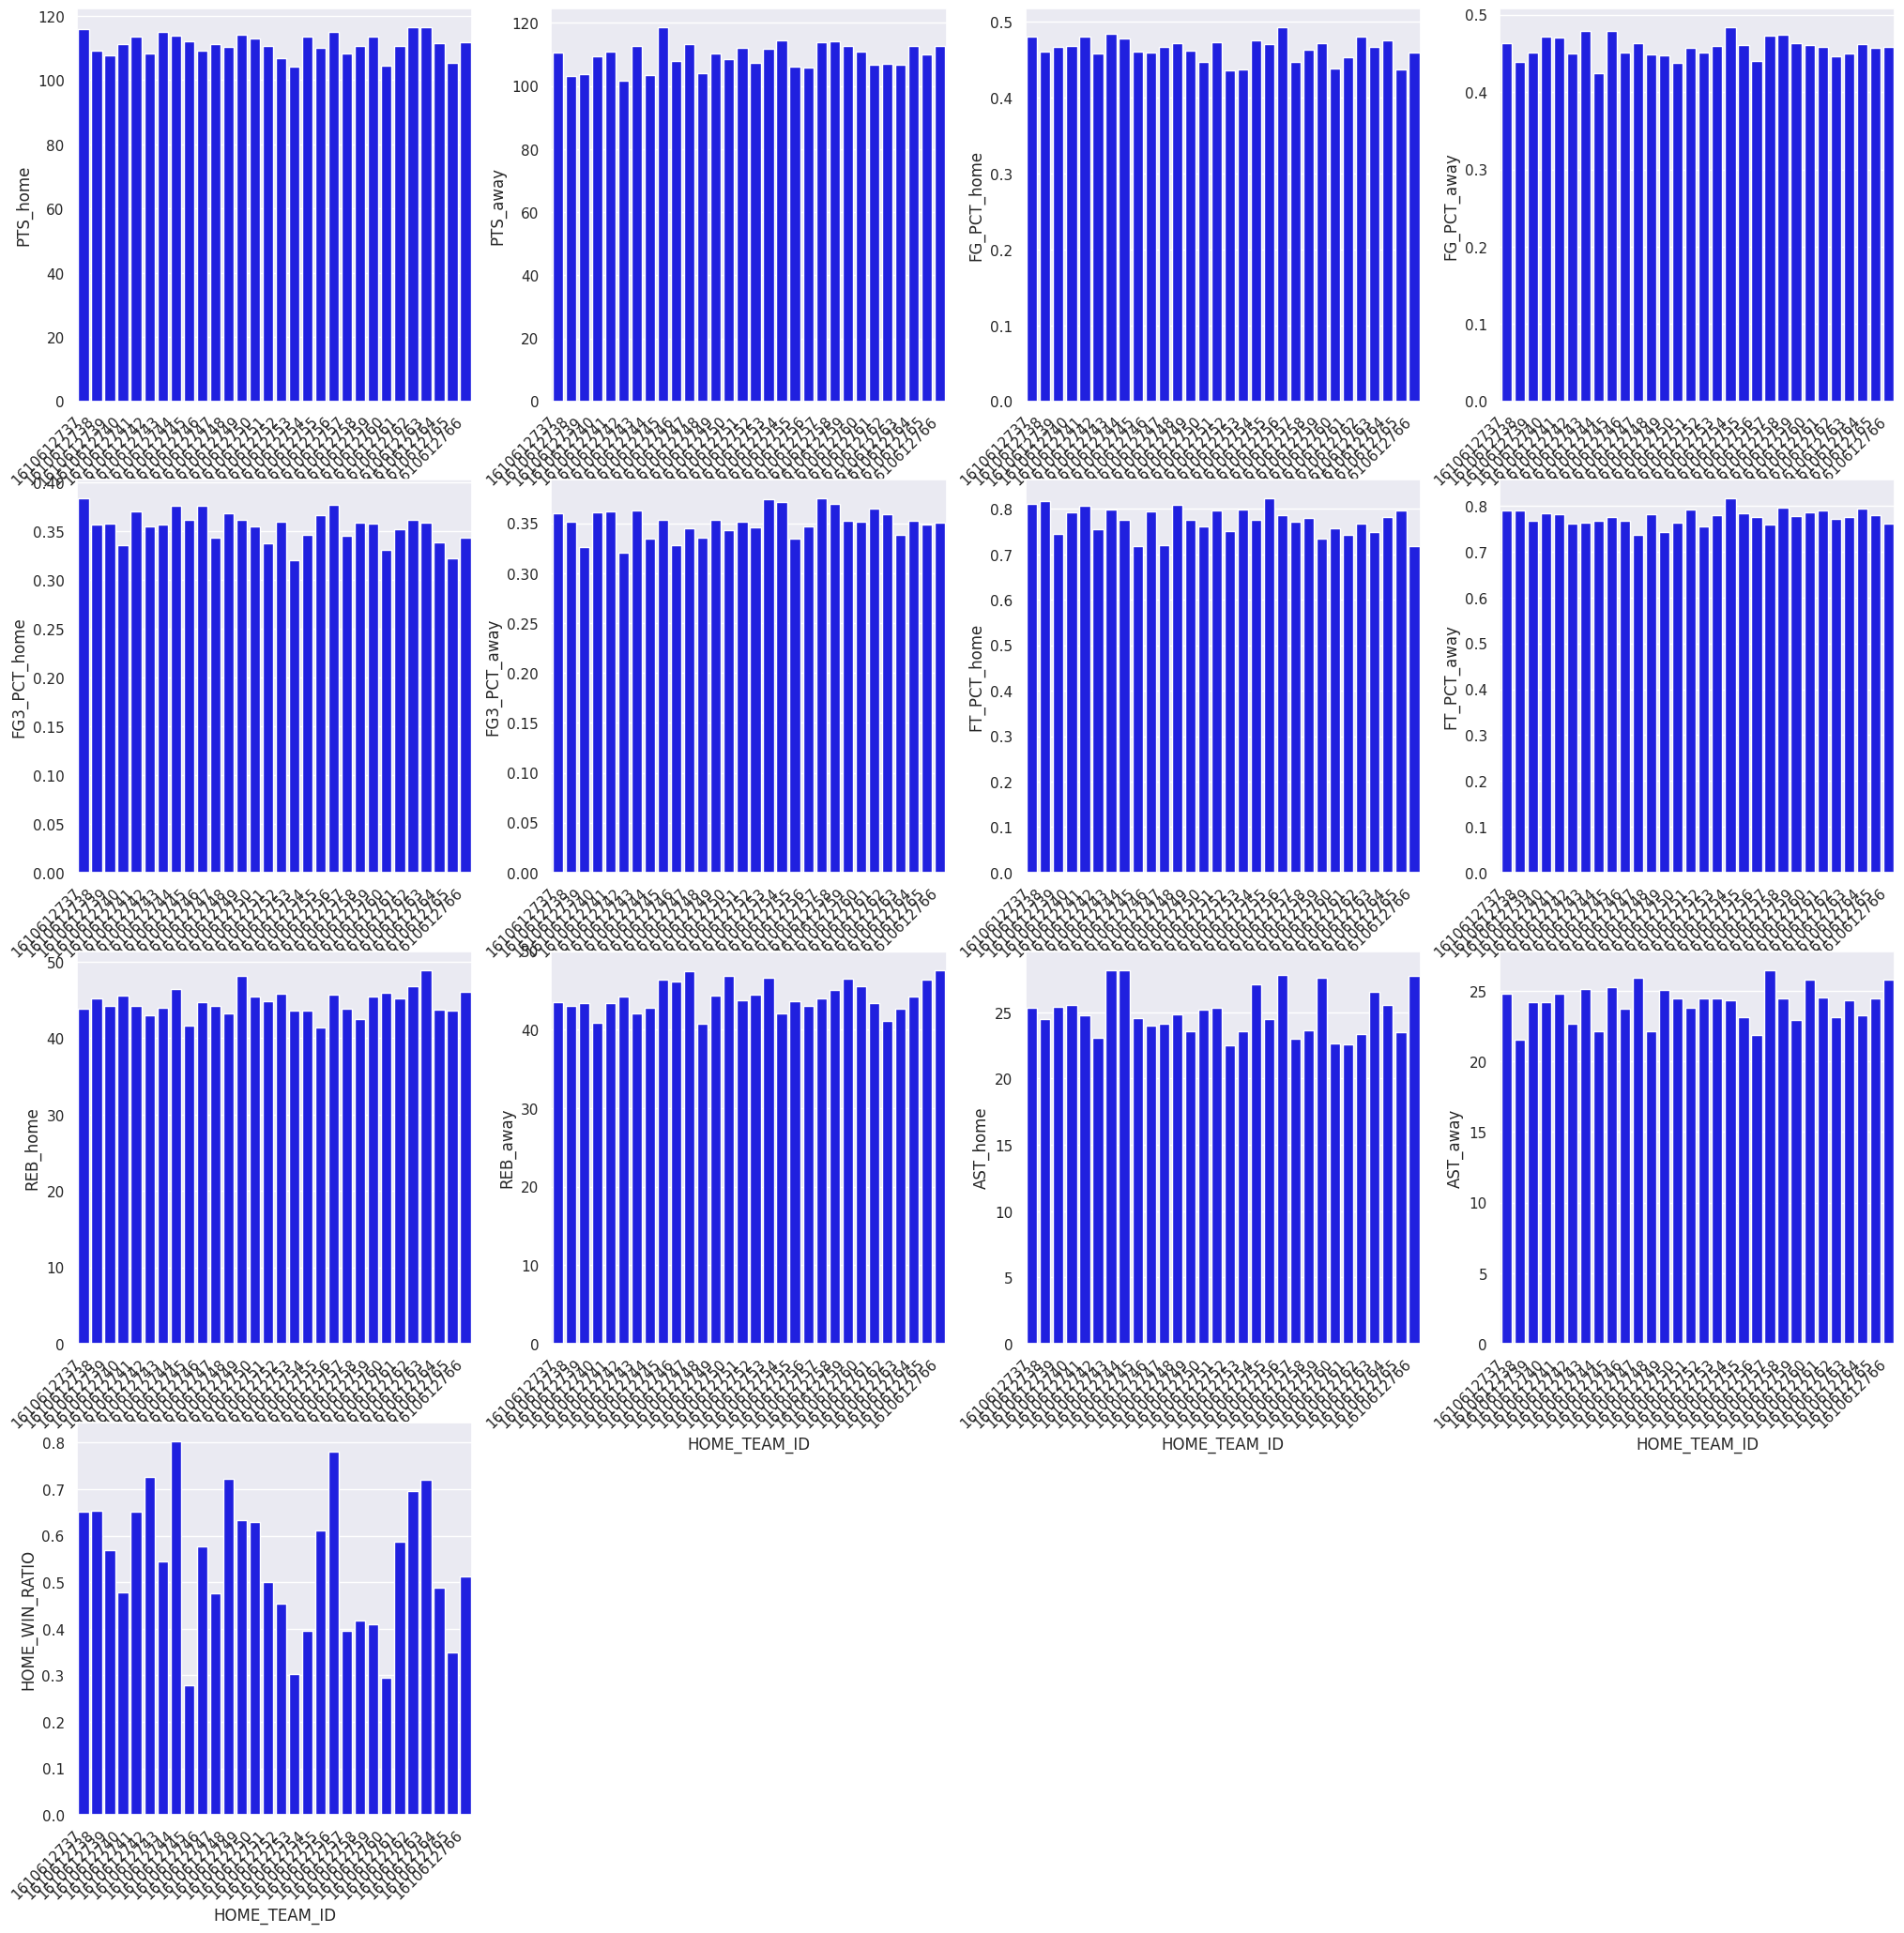

In [23]:
value_list = ['PTS_home', 'PTS_away', 
              'FG_PCT_home', 'FG_PCT_away', 
              'FG3_PCT_home', 'FG3_PCT_away',
              'FT_PCT_home', 'FT_PCT_away', 
              'REB_home', 'REB_away',
              'AST_home', 'AST_away', 
              'HOME_WIN_RATIO',
             ]
for i, column in enumerate(value_list, 1):
    plt.subplot(4,4,i)
    plt.xticks(rotation=45, horizontalalignment='right',)
    ax = sns.barplot(data=df, x='HOME_TEAM_ID', y=column, color='blue')

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GAMES_PLAYED,30.0,46.300000,3.779710,43.000000,43.250000,45.500000,48.250000,56.000000
HOME_TEAM_WINS,30.0,25.600000,8.732026,12.000000,18.500000,24.500000,30.750000,45.000000
HOME_WIN_RATIO,30.0,0.543790,0.147434,0.279070,0.427590,0.556818,0.652174,0.803571
AST_away,30.0,24.107200,1.249966,21.545455,23.155966,24.412558,24.777174,26.488372
AST_home,30.0,24.944721,1.757221,22.500000,23.573920,24.659505,25.554474,28.204545
FG3_PCT_away,30.0,0.350776,0.014052,0.320431,0.343279,0.351634,0.360946,0.374674
FG3_PCT_home,30.0,0.354328,0.015754,0.320465,0.343581,0.356977,0.361950,0.383348
FG_PCT_away,30.0,0.457730,0.013599,0.424643,0.449577,0.458338,0.463386,0.483674
FG_PCT_home,30.0,0.464052,0.015008,0.435977,0.458256,0.466758,0.474465,0.492460
FT_PCT_away,30.0,0.775708,0.016304,0.737909,0.765061,0.777027,0.785256,0.816070


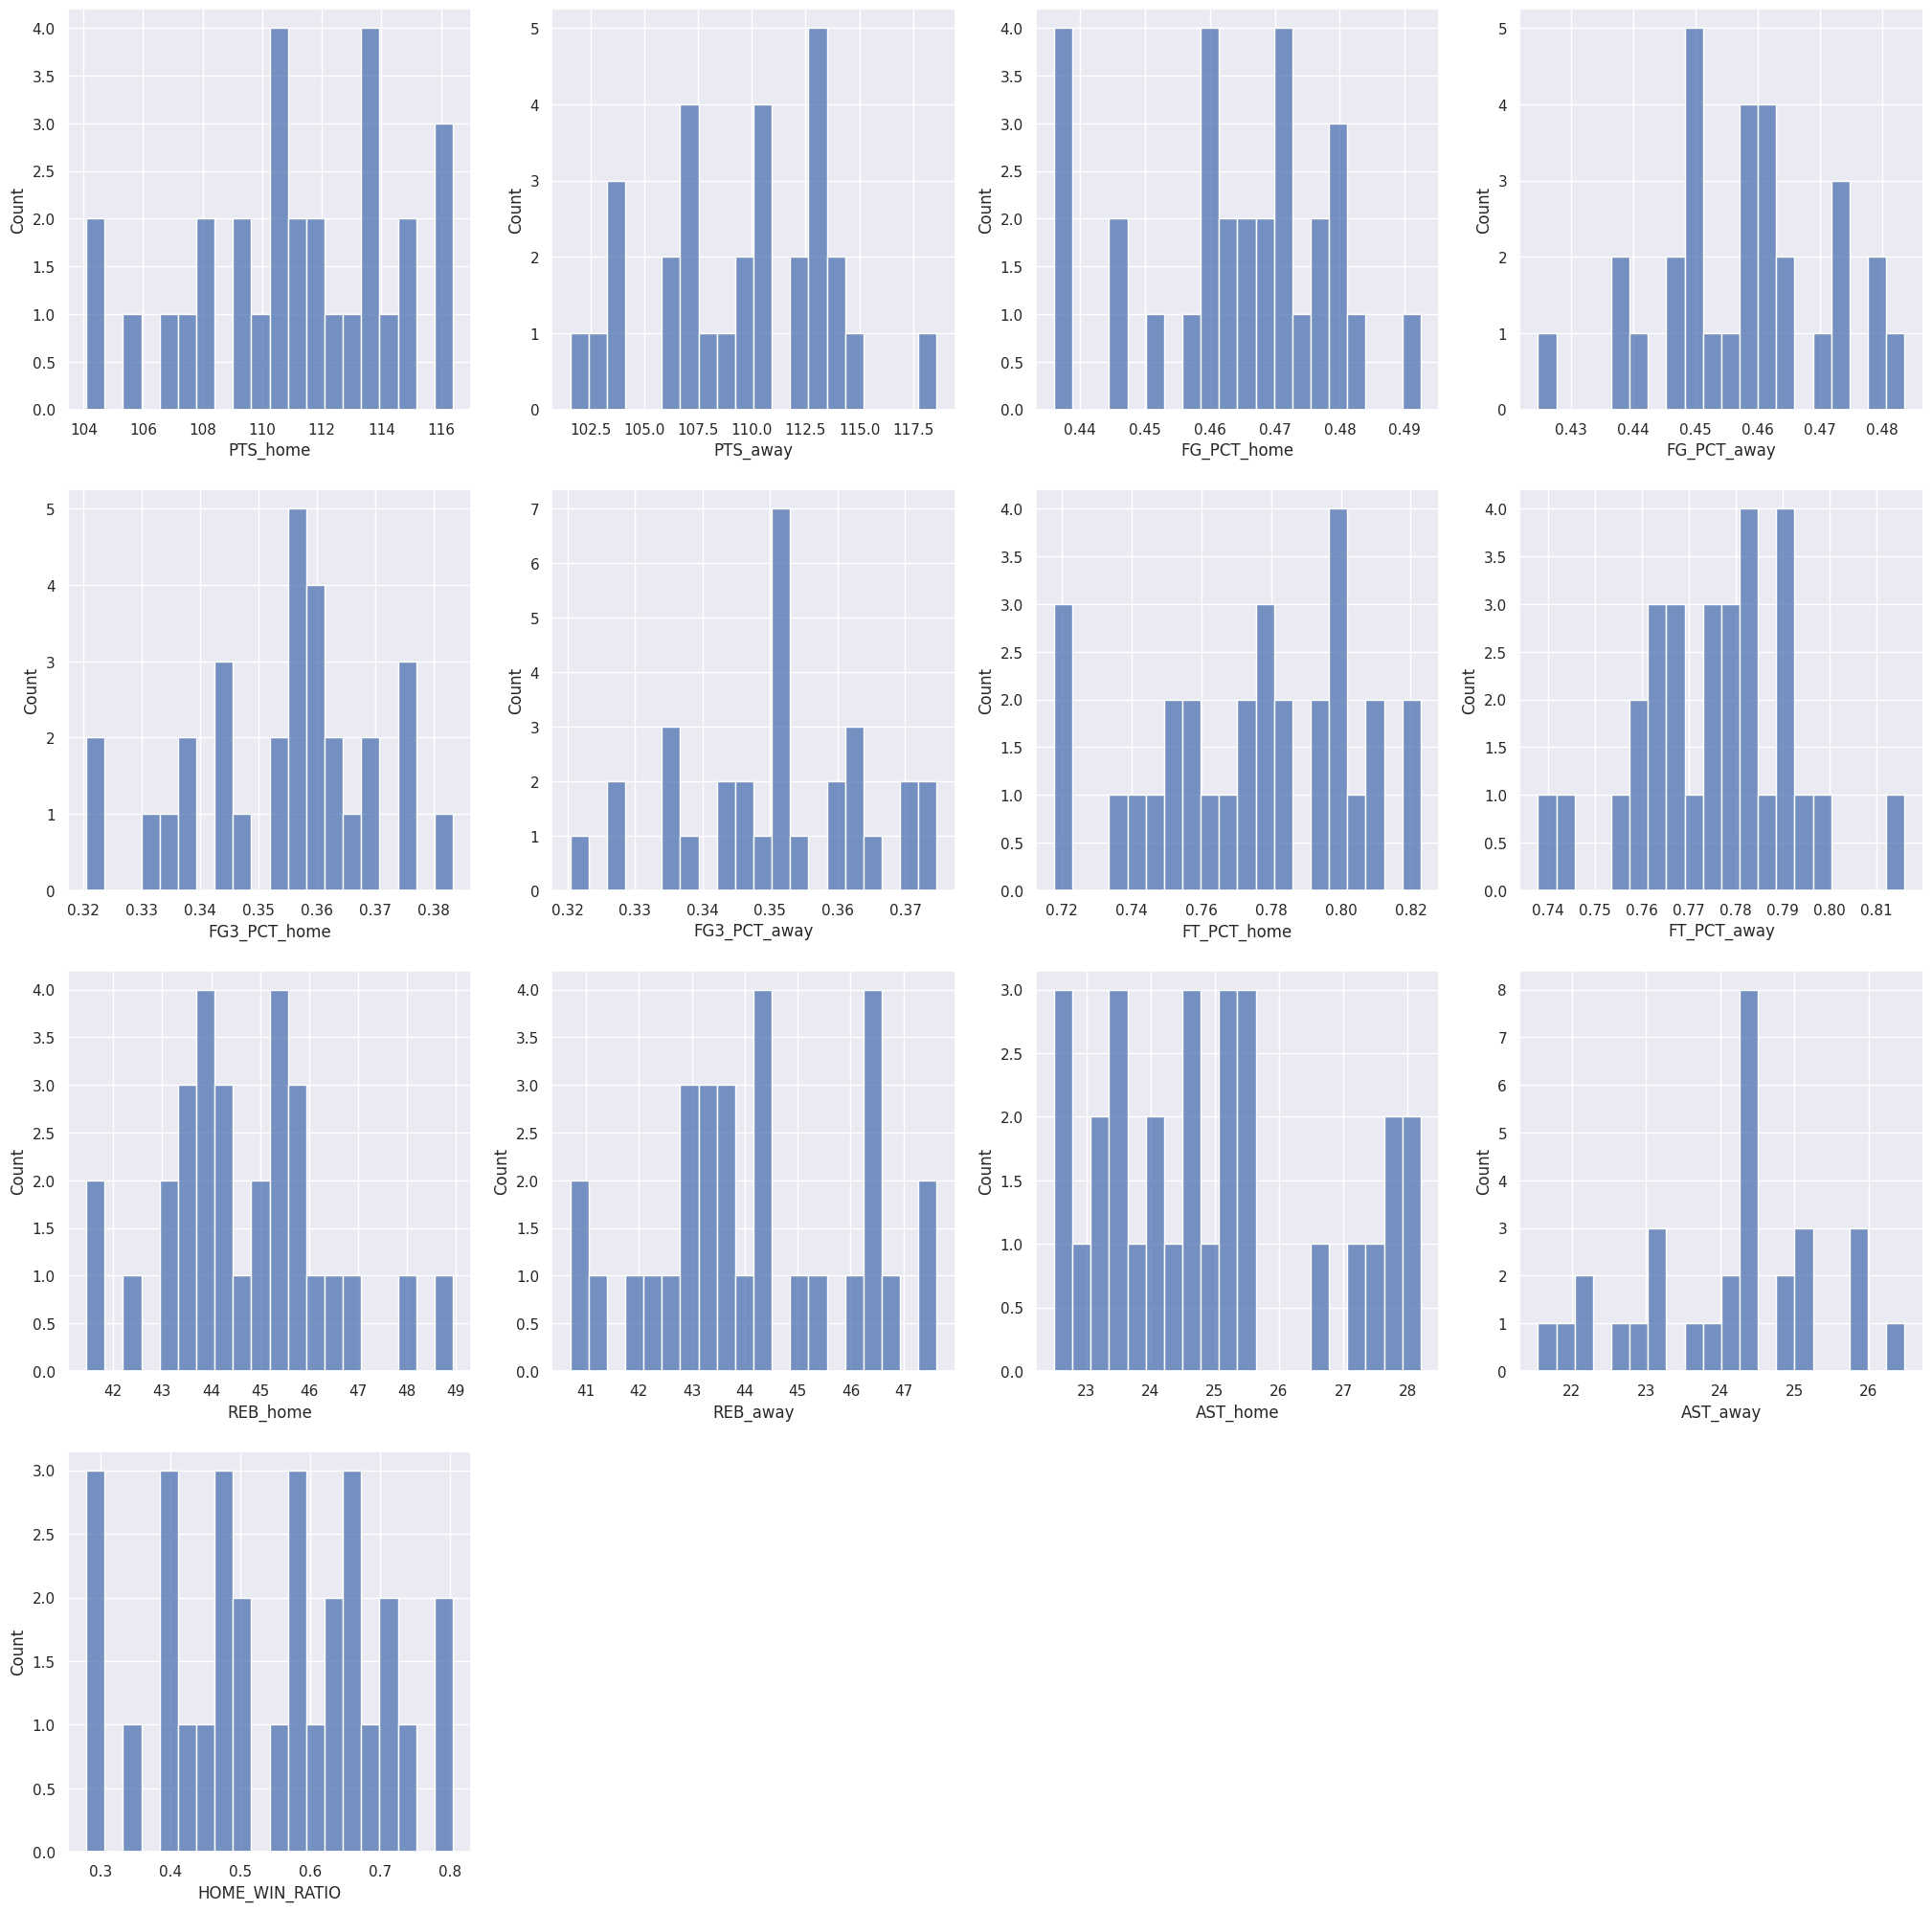

In [ ]:
value_list = ['PTS_home', 'PTS_away', 
              'FG_PCT_home', 'FG_PCT_away', 
              'FG3_PCT_home', 'FG3_PCT_away',
              'FT_PCT_home', 'FT_PCT_away', 
              'REB_home', 'REB_away',
              'AST_home', 'AST_away', 
              'HOME_WIN_RATIO',
             ]

sns.set(rc={'figure.figsize':(25,25)})
for i, column in enumerate(value_list, 1):
    plt.subplot(4,4,i)
    p=sns.histplot(x=column, data=df, stat='count', bins = 20)

###
### Correlations

PTS_away      FG_PCT_away       0.660880
PTS_home      FG_PCT_home       0.651982
              AST_home          0.587376
PTS_away      AST_away          0.582250
FG_PCT_home   AST_home          0.529699
FG_PCT_away   AST_away          0.510631
FG_PCT_home   FG3_PCT_home      0.500669
FG_PCT_away   FG3_PCT_away      0.490329
PTS_home      PTS_away          0.483536
              FG3_PCT_home      0.443945
PTS_away      FG3_PCT_away      0.438671
FG_PCT_home   HOME_TEAM_WINS    0.406867
PTS_home      HOME_TEAM_WINS    0.391160
FG3_PCT_home  AST_home          0.359274
FG3_PCT_away  AST_away          0.342717
AST_home      HOME_TEAM_WINS    0.297336
FG3_PCT_home  HOME_TEAM_WINS    0.290971
REB_home      HOME_TEAM_WINS    0.245634
PTS_away      FT_PCT_away       0.231843
PTS_home      AST_away          0.224272
              FT_PCT_home       0.215687
AST_home      PTS_away          0.191431
PTS_home      FG_PCT_away       0.170071
PTS_away      REB_away          0.162566
FG_PCT_home   PT

<Axes: >

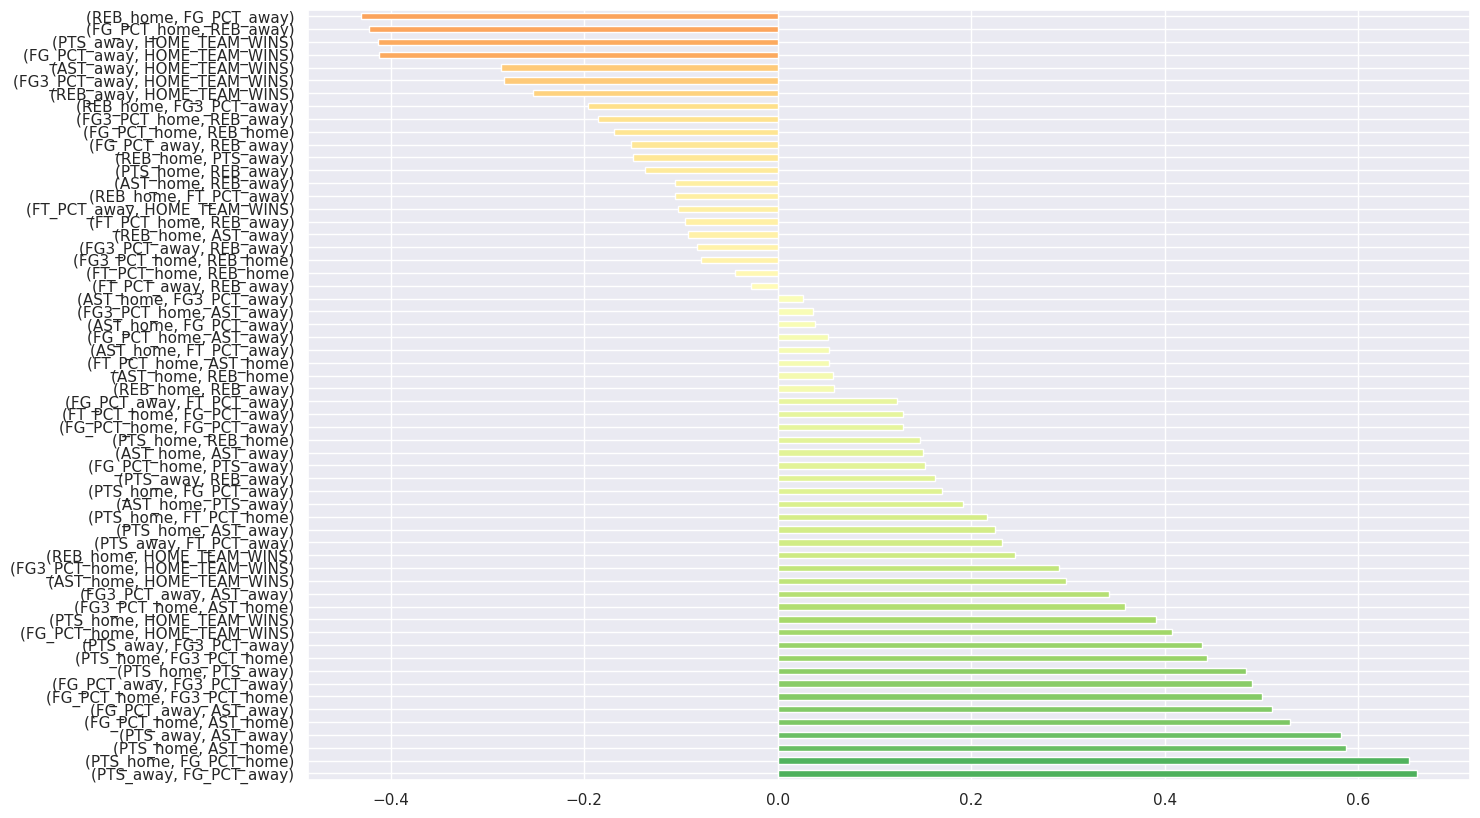

In [24]:
# correlation bar chart

from matplotlib.colors import TwoSlopeNorm

df1 = games.drop(columns=['GAME_ID'])
#df1[cat_cols] = OrdinalEncoder().fit_transform(df1[cat_cols])

useful_columns =  df1.select_dtypes(include=['number']).columns

def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0,df.shape[1]):
        for j in range(0,i+1):
            pairs_to_drop.add((cols[i],cols[j]))
    return pairs_to_drop

def get_correlations(df,n=30):
    au_corr = df.corr(method = 'spearman').unstack() #spearman used because not all data is normalized
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels = labels_to_drop).sort_values(ascending=False)
    top_n = au_corr[0:n]    
    bottom_n =  au_corr[-n:]
    top_corr = pd.concat([top_n, bottom_n])
    return top_corr

corrplot = get_correlations(df1[useful_columns])


fig, ax = plt.subplots(figsize=(15,10))
norm = TwoSlopeNorm(vmin=-1, vcenter=0, vmax =1)
colors = [plt.cm.RdYlGn(norm(c)) for c in corrplot.values]

print(corrplot)

corrplot.plot.barh(color=colors)

NOTE 
- FG_PCT and AST strongly correlated to PTS. 
- Opposing REB_PCT strongly negatively correlated to FG_PCT.

###
# ranking.csv

This dataset contains an incremental daily record of the conference standings of each team as it changes each day of the season, updating with current stats such as: 
- games played
- games won
- games lost
- winning percentage
- home record
- road record


In [25]:
ranking = pd.read_csv(DATAPATH / "raw" / "ranking.csv")
ranking.head()

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
0,1610612743,0,22022,2022-12-22,West,Denver,30,19,11,0.633,10-3,9-8,NaN
1,1610612763,0,22022,2022-12-22,West,Memphis,30,19,11,0.633,13-2,6-9,NaN
2,1610612740,0,22022,2022-12-22,West,New Orleans,31,19,12,0.613,13-4,6-8,NaN
3,1610612756,0,22022,2022-12-22,West,Phoenix,32,19,13,0.594,14-4,5-9,NaN
4,1610612746,0,22022,2022-12-22,West,LA Clippers,33,19,14,0.576,11-7,8-7,NaN


In [26]:
ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210342 entries, 0 to 210341
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TEAM_ID        210342 non-null  int64  
 1   LEAGUE_ID      210342 non-null  int64  
 2   SEASON_ID      210342 non-null  int64  
 3   STANDINGSDATE  210342 non-null  object 
 4   CONFERENCE     210342 non-null  object 
 5   TEAM           210342 non-null  object 
 6   G              210342 non-null  int64  
 7   W              210342 non-null  int64  
 8   L              210342 non-null  int64  
 9   W_PCT          210342 non-null  float64
 10  HOME_RECORD    210342 non-null  object 
 11  ROAD_RECORD    210342 non-null  object 
 12  RETURNTOPLAY   3990 non-null    float64
dtypes: float64(2), int64(6), object(5)
memory usage: 20.9+ MB


###
### Check for duplicates and nulls

In [27]:
# duplicates
ranking.duplicated().sum()

0

In [28]:
#null values
ranking.isnull().sum()

TEAM_ID               0
LEAGUE_ID             0
SEASON_ID             0
STANDINGSDATE         0
CONFERENCE            0
TEAM                  0
G                     0
W                     0
L                     0
W_PCT                 0
HOME_RECORD           0
ROAD_RECORD           0
RETURNTOPLAY     206352
dtype: int64

In [29]:
# most rows have nulls in RETURNTOPLAY
# look at those that do not
ranking[ranking['RETURNTOPLAY'].notnull()]

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
26549,1610612749,0,22019,2020-12-10,East,Milwaukee,73,56,17,0.767,30-5,26-12,1.0
26550,1610612761,0,22019,2020-12-10,East,Toronto,72,53,19,0.736,26-10,27-9,1.0
26551,1610612738,0,22019,2020-12-10,East,Boston,72,48,24,0.667,26-10,22-14,1.0
26552,1610612754,0,22019,2020-12-10,East,Indiana,73,45,28,0.616,25-11,20-17,1.0
26553,1610612748,0,22019,2020-12-10,East,Miami,73,44,29,0.603,29-7,15-22,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30654,1610612741,0,22019,2020-03-12,East,Chicago,65,22,43,0.338,14-20,8-23,0.0
30655,1610612752,0,22019,2020-03-12,East,New York,66,21,45,0.318,11-22,10-23,0.0
30656,1610612765,0,22019,2020-03-12,East,Detroit,66,20,46,0.303,11-22,9-24,0.0
30657,1610612737,0,22019,2020-03-12,East,Atlanta,67,20,47,0.299,14-20,6-27,0.0


In [30]:
ranking[ranking['RETURNTOPLAY'] == 1]

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
26549,1610612749,0,22019,2020-12-10,East,Milwaukee,73,56,17,0.767,30-5,26-12,1.0
26550,1610612761,0,22019,2020-12-10,East,Toronto,72,53,19,0.736,26-10,27-9,1.0
26551,1610612738,0,22019,2020-12-10,East,Boston,72,48,24,0.667,26-10,22-14,1.0
26552,1610612754,0,22019,2020-12-10,East,Indiana,73,45,28,0.616,25-11,20-17,1.0
26553,1610612748,0,22019,2020-12-10,East,Miami,73,44,29,0.603,29-7,15-22,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30648,1610612754,0,22019,2020-03-12,East,Indiana,65,39,26,0.600,21-11,18-15,1.0
30649,1610612755,0,22019,2020-03-12,East,Philadelphia,65,39,26,0.600,29-2,10-24,1.0
30650,1610612751,0,22019,2020-03-12,East,Brooklyn,64,30,34,0.469,18-14,12-20,1.0
30651,1610612753,0,22019,2020-03-12,East,Orlando,65,30,35,0.462,16-15,14-20,1.0


In [31]:
ranking[ranking['RETURNTOPLAY'] == 0]

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
26558,1610612766,0,22019,2020-12-10,East,Charlotte,65,23,42,0.354,10-21,13-21,0.0
26559,1610612741,0,22019,2020-12-10,East,Chicago,65,22,43,0.338,14-20,8-23,0.0
26560,1610612752,0,22019,2020-12-10,East,New York,66,21,45,0.318,11-22,10-23,0.0
26561,1610612765,0,22019,2020-12-10,East,Detroit,66,20,46,0.303,11-22,9-24,0.0
26562,1610612737,0,22019,2020-12-10,East,Atlanta,67,20,47,0.299,14-20,6-27,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30654,1610612741,0,22019,2020-03-12,East,Chicago,65,22,43,0.338,14-20,8-23,0.0
30655,1610612752,0,22019,2020-03-12,East,New York,66,21,45,0.318,11-22,10-23,0.0
30656,1610612765,0,22019,2020-03-12,East,Detroit,66,20,46,0.303,11-22,9-24,0.0
30657,1610612737,0,22019,2020-03-12,East,Atlanta,67,20,47,0.299,14-20,6-27,0.0


In [32]:
# are any in west conference?
df = ranking[ranking['RETURNTOPLAY'].notnull()]
df[df['CONFERENCE'] == 'West'].shape[0]

0

NOTE - Not sure what RETURNTOPLAY means, but it is limited to East Conference stats between 2020-03-12 and 2020-12-10, and is probably of almost no utility at the moment

In [33]:
# any LEAGUE_ID not 0?
ranking[ranking['LEAGUE_ID'] != 0].shape[0]

0

NOTE - LEAGUE_ID always 0, can drop

In [34]:
#these fields not needed for processing, analysis, or modeling

drop_fields = ['LEAGUE_ID', 'RETURNTOPLAY', 'TEAM']

#ranking = ranking.drop(drop_fields,axis=1)

###
### Describe the data


In [35]:
# fix data types first

ranking['STANDINGSDATE'] = ranking['STANDINGSDATE'].astype('datetime64[ns]')

category_fields = ['TEAM_ID', 'CONFERENCE', 'SEASON_ID']

for cat in category_fields:
    ranking[cat] = ranking[cat].astype('category')

In [36]:
ranking.describe(include = 'category').T

,count,unique,top,freq
TEAM_ID,210342,30,1610612760,7027
SEASON_ID,210342,41,22010,12480
CONFERENCE,210342,2,East,105358


In [37]:
# why 39 SEASON_IDs?
ranking['SEASON_ID'].value_counts()

SEASON_ID
22010    12480
22019    12240
22018    10470
22021    10380
22017    10380
22004    10260
22009    10230
22007    10230
22006    10200
22015    10200
22016    10200
22013    10200
22012    10200
22014    10170
22003    10150
22008    10140
22005    10140
22020     8573
22011     8550
22022     1980
12019      900
12006      780
12009      780
12012      750
12015      750
12007      720
12016      720
12013      720
12014      720
12008      690
12010      690
12003      667
12005      660
12004      630
12022      540
12018      540
12017      510
12021      480
12020      336
12011      270
22002      116
Name: count, dtype: int64

In [38]:
ranking[(ranking['SEASON_ID']==12021) & (ranking['G'] > 0)]

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
12450,1610612744,0,12021,2021-10-18,West,Golden State,5,5,0,1.00,3-0,2-0,NaN
12451,1610612742,0,12021,2021-10-18,West,Dallas,4,4,0,1.00,2-0,2-0,NaN
12452,1610612758,0,12021,2021-10-18,West,Sacramento,4,4,0,1.00,2-0,2-0,NaN
12453,1610612750,0,12021,2021-10-18,West,Minnesota,4,3,1,0.75,1-0,2-1,NaN
12454,1610612756,0,12021,2021-10-18,West,Phoenix,4,3,1,0.75,2-0,1-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15289,1610612761,0,12021,2021-10-04,East,Toronto,1,1,0,1.00,1-0,0-0,NaN
15290,1610612737,0,12021,2021-10-04,East,Atlanta,1,0,1,0.00,0-0,0-1,NaN
15291,1610612753,0,12021,2021-10-04,East,Orlando,1,0,1,0.00,0-0,0-1,NaN
15292,1610612755,0,12021,2021-10-04,East,Philadelphia,1,0,1,0.00,0-0,0-1,NaN


In [39]:
df = ranking[(ranking['SEASON_ID']==12021)]
df.describe().T

,count,mean,min,25%,50%,75%,max,std
LEAGUE_ID,480.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
STANDINGSDATE,480,2021-10-10 12:00:00,2021-10-03 00:00:00,2021-10-06 18:00:00,2021-10-10 12:00:00,2021-10-14 06:00:00,2021-10-18 00:00:00,NaN
G,480.0,2.670833,0.0,1.0,3.0,4.0,6.0,1.542706
W,480.0,1.335417,0.0,0.0,1.0,2.0,5.0,1.245449
L,480.0,1.335417,0.0,0.0,1.0,2.0,6.0,1.310785
W_PCT,480.0,0.46839,0.0,0.0,0.5,1.0,1.0,0.392305
RETURNTOPLAY,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


NOTE - SEASON_ID beginning with 1 appears to be preseason games

In [40]:
#flag preseaon stats
ranking['PRESEASON'] = ((ranking['SEASON_ID'].astype('int') < 20000).astype('int')).astype('category')
ranking

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY,PRESEASON
0,1610612743,0,22022,2022-12-22,West,Denver,30,19,11,0.633,10-3,9-8,NaN,0
1,1610612763,0,22022,2022-12-22,West,Memphis,30,19,11,0.633,13-2,6-9,NaN,0
2,1610612740,0,22022,2022-12-22,West,New Orleans,31,19,12,0.613,13-4,6-8,NaN,0
3,1610612756,0,22022,2022-12-22,West,Phoenix,32,19,13,0.594,14-4,5-9,NaN,0
4,1610612746,0,22022,2022-12-22,West,LA Clippers,33,19,14,0.576,11-7,8-7,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210337,1610612765,0,22013,2014-09-01,East,Detroit,82,29,53,0.354,17-24,12-29,NaN,0
210338,1610612738,0,22013,2014-09-01,East,Boston,82,25,57,0.305,16-25,9-32,NaN,0
210339,1610612753,0,22013,2014-09-01,East,Orlando,82,23,59,0.280,19-22,4-37,NaN,0
210340,1610612755,0,22013,2014-09-01,East,Philadelphia,82,19,63,0.232,10-31,9-32,NaN,0


In [41]:
#home record and road record need to be converted to numeric

ranking['HOME_W'] = ranking['HOME_RECORD'].apply(lambda x: x.split('-')[0]).astype('int')
ranking['HOME_L'] = ranking['HOME_RECORD'].apply(lambda x: x.split('-')[1]).astype('int')
ranking['HOME_W_PCT'] = ranking['HOME_W'] / ( ranking['HOME_W'] + ranking['HOME_L'] )

ranking['ROAD_W'] = ranking['ROAD_RECORD'].apply(lambda x: x.split('-')[0]).astype('int')
ranking['ROAD_L'] = ranking['ROAD_RECORD'].apply(lambda x: x.split('-')[1]).astype('int')
ranking['ROAD_W_PCT'] = ranking['ROAD_W'] / ( ranking['ROAD_W'] + ranking['ROAD_L'] )


In [42]:
df = ranking[ranking['PRESEASON']==0]
df.describe().T

,count,mean,min,25%,50%,75%,max,std
LEAGUE_ID,197489.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
STANDINGSDATE,197489,2013-05-29 20:07:47.606803456,2003-10-01 00:00:00,2008-08-08 00:00:00,2013-05-26 00:00:00,2018-03-21 00:00:00,2022-12-22 00:00:00,NaN
G,197489.0,60.146023,0.0,40.0,72.0,82.0,82.0,25.972496
W,197489.0,30.072951,0.0,17.0,30.0,43.0,73.0,16.368172
L,197489.0,30.073072,0.0,18.0,30.0,42.0,72.0,16.347156
W_PCT,197489.0,0.498401,0.0,0.383,0.5,0.619,1.0,0.169776
RETURNTOPLAY,3990.0,0.6,0.0,0.0,1.0,1.0,1.0,0.489959
HOME_W,197489.0,17.672635,0.0,10.0,18.0,25.0,40.0,9.506938
HOME_L,197489.0,12.400367,0.0,6.0,12.0,18.0,34.0,7.686
HOME_W_PCT,196094.0,0.586711,0.0,0.461538,0.6,0.727273,1.0,0.191857


## Validation

In [43]:
# check that key fields are always increasing since they represent running totals

df = ranking[ranking['PRESEASON']==0]

seasons = df["SEASON_ID"].unique().to_list()
teams = df["TEAM_ID"].unique().to_list()
fields = ['G','W','L','HOME_W','HOME_L','ROAD_W','ROAD_L'] 

for season in seasons:
    for team in teams:
        df = ranking[(ranking['SEASON_ID'] == season) & (ranking['TEAM_ID'] == team)]
        df = df.set_index('STANDINGSDATE')
        df = df.sort_index(ascending=True)
        
        for field in fields:
            increasing = df[field].is_monotonic_increasing
            if not(increasing):
                print("Not increasing:", season, team, field)



In [44]:
#sample 5 records to validate against historical record on google

df = ranking[ranking['PRESEASON']==0]
df.sample(n=5)

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY,PRESEASON,HOME_W,HOME_L,HOME_W_PCT,ROAD_W,ROAD_L,ROAD_W_PCT
13030,1610612740,0,22020,2021-09-10,West,New Orleans,72,31,41,0.431,18-18,13-23,NaN,0,18,18,0.500000,13,23,0.361111
168262,1610612761,0,22005,2006-03-05,East,Toronto,59,21,38,0.356,11-17,10-21,NaN,0,11,17,0.392857,10,21,0.322581
74276,1610612758,0,22006,2007-03-24,West,Sacramento,69,29,40,0.420,18-15,11-25,NaN,0,18,15,0.545455,11,25,0.305556
105366,1610612740,0,22016,2017-08-27,West,New Orleans,82,34,48,0.415,21-20,13-28,NaN,0,21,20,0.512195,13,28,0.317073
140761,1610612737,0,22010,2011-03-12,East,Atlanta,66,38,28,0.576,19-12,19-16,NaN,0,19,12,0.612903,19,16,0.542857


In [46]:
# make sure each date only has data for 30 teams
# from the later merge process in data processing, there appears to be an issue
df = ranking.groupby(['STANDINGSDATE']).count()
df = df.reset_index()
df
df[df['TEAM_ID'] > 30]

,STANDINGSDATE,TEAM_ID,LEAGUE_ID,SEASON_ID,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY,PRESEASON,HOME_W,HOME_L,HOME_W_PCT,ROAD_W,ROAD_L,ROAD_W_PCT
6290,2020-12-20,33,33,33,33,33,33,33,33,33,33,33,0,33,33,33,33,33,33,33
6291,2020-12-21,33,33,33,33,33,33,33,33,33,33,33,0,33,33,33,33,33,33,33
6297,2020-12-27,36,36,36,36,36,36,36,36,36,36,36,0,36,36,36,29,36,36,31
6298,2020-12-28,38,38,38,38,38,38,38,38,38,38,38,0,38,38,38,33,38,38,34
6299,2020-12-29,35,35,35,35,35,35,35,35,35,35,35,0,35,35,35,31,35,35,34
6300,2020-12-30,31,31,31,31,31,31,31,31,31,31,31,0,31,31,31,29,31,31,31
6301,2020-12-31,31,31,31,31,31,31,31,31,31,31,31,0,31,31,31,30,31,31,31
6302,2021-01-01,32,32,32,32,32,32,32,32,32,32,32,0,32,32,32,32,32,32,32


In [47]:
df = ranking[ranking['STANDINGSDATE'] == '2020-12-28']
df['TEAM_ID'].value_counts()

TEAM_ID
1610612752    2
1610612743    2
1610612763    2
1610612738    2
1610612749    2
1610612744    2
1610612766    2
1610612742    2
1610612756    1
1610612765    1
1610612764    1
1610612739    1
1610612762    1
1610612761    1
1610612760    1
1610612759    1
1610612758    1
1610612757    1
1610612755    1
1610612745    1
1610612754    1
1610612753    1
1610612740    1
1610612751    1
1610612750    1
1610612741    1
1610612748    1
1610612747    1
1610612746    1
1610612737    1
Name: count, dtype: int64

In [48]:
df[df['TEAM_ID'] == 1610612752]

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY,PRESEASON,HOME_W,HOME_L,HOME_W_PCT,ROAD_W,ROAD_L,ROAD_W_PCT
19495,1610612752,0,22020,2020-12-28,East,New York,3,1,2,0.333,1-1,0-1,NaN,0,1,1,0.5,0,1,0.0
22012,1610612752,0,22020,2020-12-28,East,New York,3,1,2,0.333,1-1,0-1,NaN,0,1,1,0.5,0,1,0.0


In [49]:
df = df[df['TEAM_ID'] == 1610612752]
df.duplicated()

19495    False
22012    False
dtype: bool

###
## game_details.csv

In [50]:
details = pd.read_csv(DATAPATH / "raw" / "games_details.csv")
details

/tmp/ipykernel_6811/3681003669.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  details = pd.read_csv(DATAPATH / "raw" / "games_details.csv")


,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22200477,1610612759,SAS,San Antonio,1629641,Romeo Langford,Romeo,F,NaN,18:06,1.0,1.0,1.000,0.0,0.0,0.000,0.0,0.0,0.000,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0
1,22200477,1610612759,SAS,San Antonio,1631110,Jeremy Sochan,Jeremy,F,NaN,31:01,7.0,14.0,0.500,2.0,4.0,0.500,7.0,10.0,0.700,6.0,3.0,9.0,6.0,1.0,0.0,2.0,1.0,23.0,-14.0
2,22200477,1610612759,SAS,San Antonio,1627751,Jakob Poeltl,Jakob,C,NaN,21:42,6.0,9.0,0.667,0.0,0.0,0.000,1.0,1.0,1.000,1.0,3.0,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0
3,22200477,1610612759,SAS,San Antonio,1630170,Devin Vassell,Devin,G,NaN,30:20,4.0,13.0,0.308,1.0,6.0,0.167,1.0,1.0,1.000,0.0,9.0,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0
4,22200477,1610612759,SAS,San Antonio,1630200,Tre Jones,Tre,G,NaN,27:44,7.0,12.0,0.583,1.0,3.0,0.333,4.0,4.0,1.000,0.0,2.0,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668623,11200005,1610612743,DEN,Denver,202706,Jordan Hamilton,NaN,NaN,NaN,19,4.0,9.0,0.444,3.0,6.0,0.500,6.0,7.0,0.857,0.0,2.0,2.0,0.0,2.0,0.0,1.0,3.0,17.0,NaN
668624,11200005,1610612743,DEN,Denver,202702,Kenneth Faried,NaN,NaN,NaN,23,7.0,11.0,0.636,0.0,0.0,0.000,4.0,4.0,1.000,1.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0,18.0,NaN
668625,11200005,1610612743,DEN,Denver,201585,Kosta Koufos,NaN,NaN,NaN,15,3.0,7.0,0.429,0.0,0.0,0.000,0.0,0.0,0.000,3.0,5.0,8.0,0.0,1.0,0.0,0.0,3.0,6.0,NaN
668626,11200005,1610612743,DEN,Denver,202389,Timofey Mozgov,NaN,NaN,NaN,19,1.0,1.0,1.000,0.0,0.0,0.000,0.0,2.0,0.000,1.0,2.0,3.0,1.0,0.0,0.0,4.0,2.0,2.0,NaN


In [51]:
details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668628 entries, 0 to 668627
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   GAME_ID            668628 non-null  int64  
 1   TEAM_ID            668628 non-null  int64  
 2   TEAM_ABBREVIATION  668628 non-null  object 
 3   TEAM_CITY          668628 non-null  object 
 4   PLAYER_ID          668628 non-null  int64  
 5   PLAYER_NAME        668628 non-null  object 
 6   NICKNAME           53037 non-null   object 
 7   START_POSITION     255765 non-null  object 
 8   COMMENT            109689 non-null  object 
 9   MIN                558938 non-null  object 
 10  FGM                558938 non-null  float64
 11  FGA                558938 non-null  float64
 12  FG_PCT             558938 non-null  float64
 13  FG3M               558938 non-null  float64
 14  FG3A               558938 non-null  float64
 15  FG3_PCT            558938 non-null  float64
 16  FT

###
### Check for duplicates and nulls

In [52]:
# duplicates
details.duplicated().sum()

0

In [53]:
#null values
details.isnull().sum()

GAME_ID                   0
TEAM_ID                   0
TEAM_ABBREVIATION         0
TEAM_CITY                 0
PLAYER_ID                 0
PLAYER_NAME               0
NICKNAME             615591
START_POSITION       412863
COMMENT              558939
MIN                  109690
FGM                  109690
FGA                  109690
FG_PCT               109690
FG3M                 109690
FG3A                 109690
FG3_PCT              109690
FTM                  109690
FTA                  109690
FT_PCT               109690
OREB                 109690
DREB                 109690
REB                  109690
AST                  109690
STL                  109690
BLK                  109690
TO                   109690
PF                   109690
PTS                  109690
PLUS_MINUS           133351
dtype: int64

In [54]:
#the 105603 nulls across all the key stats seems most important
details[details['MIN'].isna()]

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
13,22200477,1610612759,SAS,San Antonio,203476,Gorgui Dieng,Gorgui,NaN,DNP - Coach's Decision,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,22200478,1610612762,UTA,Utah,1630695,Micah Potter,Micah,NaN,DNP - Coach's Decision,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,22200466,1610612749,MIL,Milwaukee,203648,Thanasis Antetokounmpo,Thanasis,NaN,DNP - Coach's Decision,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,22200466,1610612749,MIL,Milwaukee,201588,George Hill,George,NaN,DNP - Coach's Decision,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,22200466,1610612749,MIL,Milwaukee,201586,Serge Ibaka,Serge,NaN,DNP - Coach's Decision,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665946,21200003,1610612747,LAL,Los Angeles,203135,Robert Sacre,NaN,NaN,DNP - Coach's Decision,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
665958,21200001,1610612764,WAS,Washington,201858,Cartier Martin,NaN,NaN,DNP - Coach's Decision,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
665969,21200001,1610612739,CLE,Cleveland,201956,Omri Casspi,NaN,NaN,DNP - Coach's Decision,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
665970,21200001,1610612739,CLE,Cleveland,202720,Jon Leuer,NaN,NaN,DNP - Coach's Decision,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


--    
**COMMENT field**

In [55]:
# the COMMENT field seems to indicate when the player did not play
pd.set_option('display.max_rows', 20)
df = details[details['MIN'].isna()]
df['COMMENT'].value_counts()

COMMENT
DNP - Coach's Decision                      58054
DNP - Coach's Decision                      30547
DND - Injury/Illness                         1267
DNP - Injury/Illness                         1161
DNP - Injury/Illness                         1151
                                            ...  
DND - Strained rt. calf                         1
DND - Left Achilles Surgery.                    1
DND - Tendonitis Left Ankle                     1
DND - Right quadriceps strain                   1
DND - Non-Displaced Fracture, Left Fibul        1
Name: count, Length: 5348, dtype: int64

In [56]:
# DNP - Did not play, DND - did not dress, NWT - not with team
# are any of these null?
df['COMMENT'].isna().sum()

1

In [57]:
#which one?
df[df['COMMENT'].isna()]

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
483530,11700036,1610612758,SAC,Sacramento,204022,Jack Cooley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


NOTE - records where all stats are missing indicates games where that player did not play. This is indicated in the COMMENT field except for the one record above

In [58]:
#check pattern
df[df['COMMENT'].str[4:5] != '-']

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
607,22200458,1610612757,POR,Portland,1627780,Gary Payton II,Gary,NaN,DND-Return to Competition Reconditioning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
930,22200441,1610612757,POR,Portland,1627780,Gary Payton II,Gary,NaN,DND-Return to Competition Reconditioning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1899,22200407,1610612757,POR,Portland,1627780,Gary Payton II,Gary,NaN,DND-Return to Competition Reconditioning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12563,12200060,1610612765,DET,Detroit,203457,Nerlens Noel,Nerlens,NaN,NWT-Return to Competition Reconditioning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12943,12200047,1610612765,DET,Detroit,203457,Nerlens Noel,Nerlens,NaN,NWT-Return to Competition Reconditioning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447564,11800054,1610612744,GSW,Golden State,203805,Will Cherry,NaN,NaN,DND_COACH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
448940,11800002,1610612766,CHA,Charlotte,1628370,Malik Monk,NaN,NaN,DND_COACH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
451318,21701220,1610612752,NYK,New York,201584,Courtney Lee,NaN,NaN,DND_COACH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
477511,21700178,1610612746,LAC,LA,201568,Danilo Gallinari,NaN,NaN,Inactive - Injury/Illness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


NOTE - 1121 records do not follow the "XXX -" pattern

In [59]:
#list the comments that do not follow the pattern
df['COMMENT'][df['COMMENT'].str[4:5] != '-'].value_counts()

COMMENT
NWT_NOT_WITH_TEAM                           115
NWT                                          53
NWT_LEAGUE_SUSPENSION                        36
Did Not Dress - Right Ankle Sprain           20
DND                                          18
                                           ... 
Did Not Dress - Medial Tibia bone bruise      1
Did Not Dress - Rt Knee MCL Sprain            1
Did Not Dress - Sprained Rib                  1
DND-lower back contusion                      1
Inactive - Injury/Illness                     1
Name: count, Length: 541, dtype: int64

In [60]:
#list any comments when stats not null
df = details[details['MIN'].notna()]
df['COMMENT'].value_counts().sum()

0

NOTE - COMMENT only used when player did not play

--      
**MIN field**

Minutes played seems to have mixed data: integer minutes and MIN:SEC

In [61]:
details['MIN'].value_counts()

MIN
5               1989
12:00           1788
24              1185
22              1123
21              1059
                ... 
12.000000:29       1
34.000000:50       1
22.000000:07       1
34.000000:52       1
54:48              1
Name: count, Length: 3802, dtype: int64

In [62]:
# see if any values are left if we filter out nulls, isdigit(), and strings with ":"
df = details[details['MIN'].notna()]
df = df[~df['MIN'].str.isdigit()]
df = df[~df['MIN'].str.contains(':')]
df
df[df['GAME_ID'] == 10800045]

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
139943,10800045,1610612745,HOU,Houston,201171,Carl Landry,NaN,NaN,NaN,-9,4.0,8.0,0.500,0.0,0.0,0.0,2.0,2.0,1.000,4.0,3.0,7.0,0.0,0.0,0.0,2.0,3.0,10.0,NaN
139944,10800045,1610612745,HOU,Houston,101236,Chuck Hayes,NaN,NaN,NaN,-5,2.0,3.0,0.667,0.0,0.0,0.0,0.0,0.0,0.000,1.0,4.0,5.0,0.0,1.0,1.0,0.0,0.0,4.0,NaN
139948,10800045,1610612745,HOU,Houston,1897,Metta World Peace,NaN,NaN,NaN,-7,3.0,11.0,0.273,0.0,4.0,0.0,2.0,3.0,0.667,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,8.0,NaN
139950,10800045,1610612745,HOU,Houston,101144,Von Wafer,NaN,NaN,NaN,-3,2.0,8.0,0.250,2.0,4.0,0.5,0.0,0.0,0.000,0.0,2.0,2.0,0.0,0.0,0.0,2.0,2.0,6.0,NaN
139952,10800045,1610612760,OKC,Oklahoma City,101243,Chris Alexander,NaN,NaN,NaN,-8,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN
139954,10800045,1610612760,OKC,Oklahoma City,2863,Damien Wilkins,NaN,NaN,NaN,-2,4.0,9.0,0.444,1.0,2.0,0.5,0.0,0.0,0.000,0.0,3.0,3.0,0.0,0.0,0.0,0.0,3.0,9.0,NaN
139955,10800045,1610612760,OKC,Oklahoma City,201182,Derrick Byars,NaN,NaN,NaN,-5,0.0,1.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,NaN
139958,10800045,1610612760,OKC,Oklahoma City,101130,Johan Petro,NaN,NaN,NaN,-4,5.0,9.0,0.556,0.0,0.0,0.0,2.0,2.0,1.000,3.0,4.0,7.0,1.0,0.0,1.0,1.0,5.0,12.0,NaN
139959,10800045,1610612760,OKC,Oklahoma City,201142,Kevin Durant,NaN,NaN,NaN,-3,8.0,16.0,0.500,0.0,1.0,0.0,10.0,11.0,0.909,3.0,2.0,5.0,4.0,4.0,3.0,2.0,2.0,26.0,NaN


NOTE - 12 records have negative minutes played

In [63]:
# convert MIN:SEC to float

df = details.loc[details['MIN'].str.contains(':',na=False)]
df['MIN_whole'] = df['MIN'].apply(lambda x: x.split(':')[0].split('.')[0]).astype("int8")
df['MIN_seconds'] = df['MIN'].apply(lambda x: x.split(':')[1]).astype("int8")
df['MIN'] = df['MIN_whole'] + (df['MIN_seconds'] / 60)

details['MIN'].loc[details['MIN'].str.contains(':',na=False)] = df['MIN']
details['MIN'] = details['MIN'].astype("float64")

# convert negatives to positive
details['MIN'].loc[details['MIN'] < 0] = -(df['MIN'])

details


/tmp/ipykernel_6811/1912658297.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MIN_whole'] = df['MIN'].apply(lambda x: x.split(':')[0].split('.')[0]).astype("int8")
/tmp/ipykernel_6811/1912658297.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MIN_seconds'] = df['MIN'].apply(lambda x: x.split(':')[1]).astype("int8")
/tmp/ipykernel_6811/1912658297.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22200477,1610612759,SAS,San Antonio,1629641,Romeo Langford,Romeo,F,NaN,18.100000,1.0,1.0,1.000,0.0,0.0,0.000,0.0,0.0,0.000,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0
1,22200477,1610612759,SAS,San Antonio,1631110,Jeremy Sochan,Jeremy,F,NaN,31.016667,7.0,14.0,0.500,2.0,4.0,0.500,7.0,10.0,0.700,6.0,3.0,9.0,6.0,1.0,0.0,2.0,1.0,23.0,-14.0
2,22200477,1610612759,SAS,San Antonio,1627751,Jakob Poeltl,Jakob,C,NaN,21.700000,6.0,9.0,0.667,0.0,0.0,0.000,1.0,1.0,1.000,1.0,3.0,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0
3,22200477,1610612759,SAS,San Antonio,1630170,Devin Vassell,Devin,G,NaN,30.333333,4.0,13.0,0.308,1.0,6.0,0.167,1.0,1.0,1.000,0.0,9.0,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0
4,22200477,1610612759,SAS,San Antonio,1630200,Tre Jones,Tre,G,NaN,27.733333,7.0,12.0,0.583,1.0,3.0,0.333,4.0,4.0,1.000,0.0,2.0,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668623,11200005,1610612743,DEN,Denver,202706,Jordan Hamilton,NaN,NaN,NaN,19.000000,4.0,9.0,0.444,3.0,6.0,0.500,6.0,7.0,0.857,0.0,2.0,2.0,0.0,2.0,0.0,1.0,3.0,17.0,NaN
668624,11200005,1610612743,DEN,Denver,202702,Kenneth Faried,NaN,NaN,NaN,23.000000,7.0,11.0,0.636,0.0,0.0,0.000,4.0,4.0,1.000,1.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0,18.0,NaN
668625,11200005,1610612743,DEN,Denver,201585,Kosta Koufos,NaN,NaN,NaN,15.000000,3.0,7.0,0.429,0.0,0.0,0.000,0.0,0.0,0.000,3.0,5.0,8.0,0.0,1.0,0.0,0.0,3.0,6.0,NaN
668626,11200005,1610612743,DEN,Denver,202389,Timofey Mozgov,NaN,NaN,NaN,19.000000,1.0,1.0,1.000,0.0,0.0,0.000,0.0,2.0,0.000,1.0,2.0,3.0,1.0,0.0,0.0,4.0,2.0,2.0,NaN


--     
**START_POSITION field**

In [64]:
details['START_POSITION'].value_counts()

START_POSITION
G    102315
F    102309
C     51141
Name: count, dtype: int64

NOTE - maybe convert nulls to a character if player did play but did not start

### describe data

In [65]:
details.describe(include = 'float').T.applymap('{:,.4f}'.format)

,count,mean,std,min,25%,50%,75%,max
MIN,"558,926.0000",22.9098,11.2347,0.0000,14.6167,23.3500,31.8000,96.0000
FGM,"558,938.0000",3.5884,3.0305,0.0000,1.0000,3.0000,5.0000,28.0000
FGA,"558,938.0000",7.8967,5.6770,0.0000,3.0000,7.0000,11.0000,50.0000
FG_PCT,"558,938.0000",0.4168,0.2519,0.0000,0.2670,0.4290,0.5710,1.0000
FG3M,"558,938.0000",0.7781,1.2276,0.0000,0.0000,0.0000,1.0000,14.0000
FG3A,"558,938.0000",2.1860,2.5699,0.0000,0.0000,1.0000,4.0000,24.0000
FG3_PCT,"558,938.0000",0.2010,0.2897,0.0000,0.0000,0.0000,0.4000,1.0000
FTM,"558,938.0000",1.7332,2.3540,0.0000,0.0000,1.0000,3.0000,26.0000
FTA,"558,938.0000",2.2842,2.8866,0.0000,0.0000,2.0000,4.0000,39.0000
FT_PCT,"558,938.0000",0.4359,0.4282,0.0000,0.0000,0.5000,0.9090,1.0000


###
### Check distributions

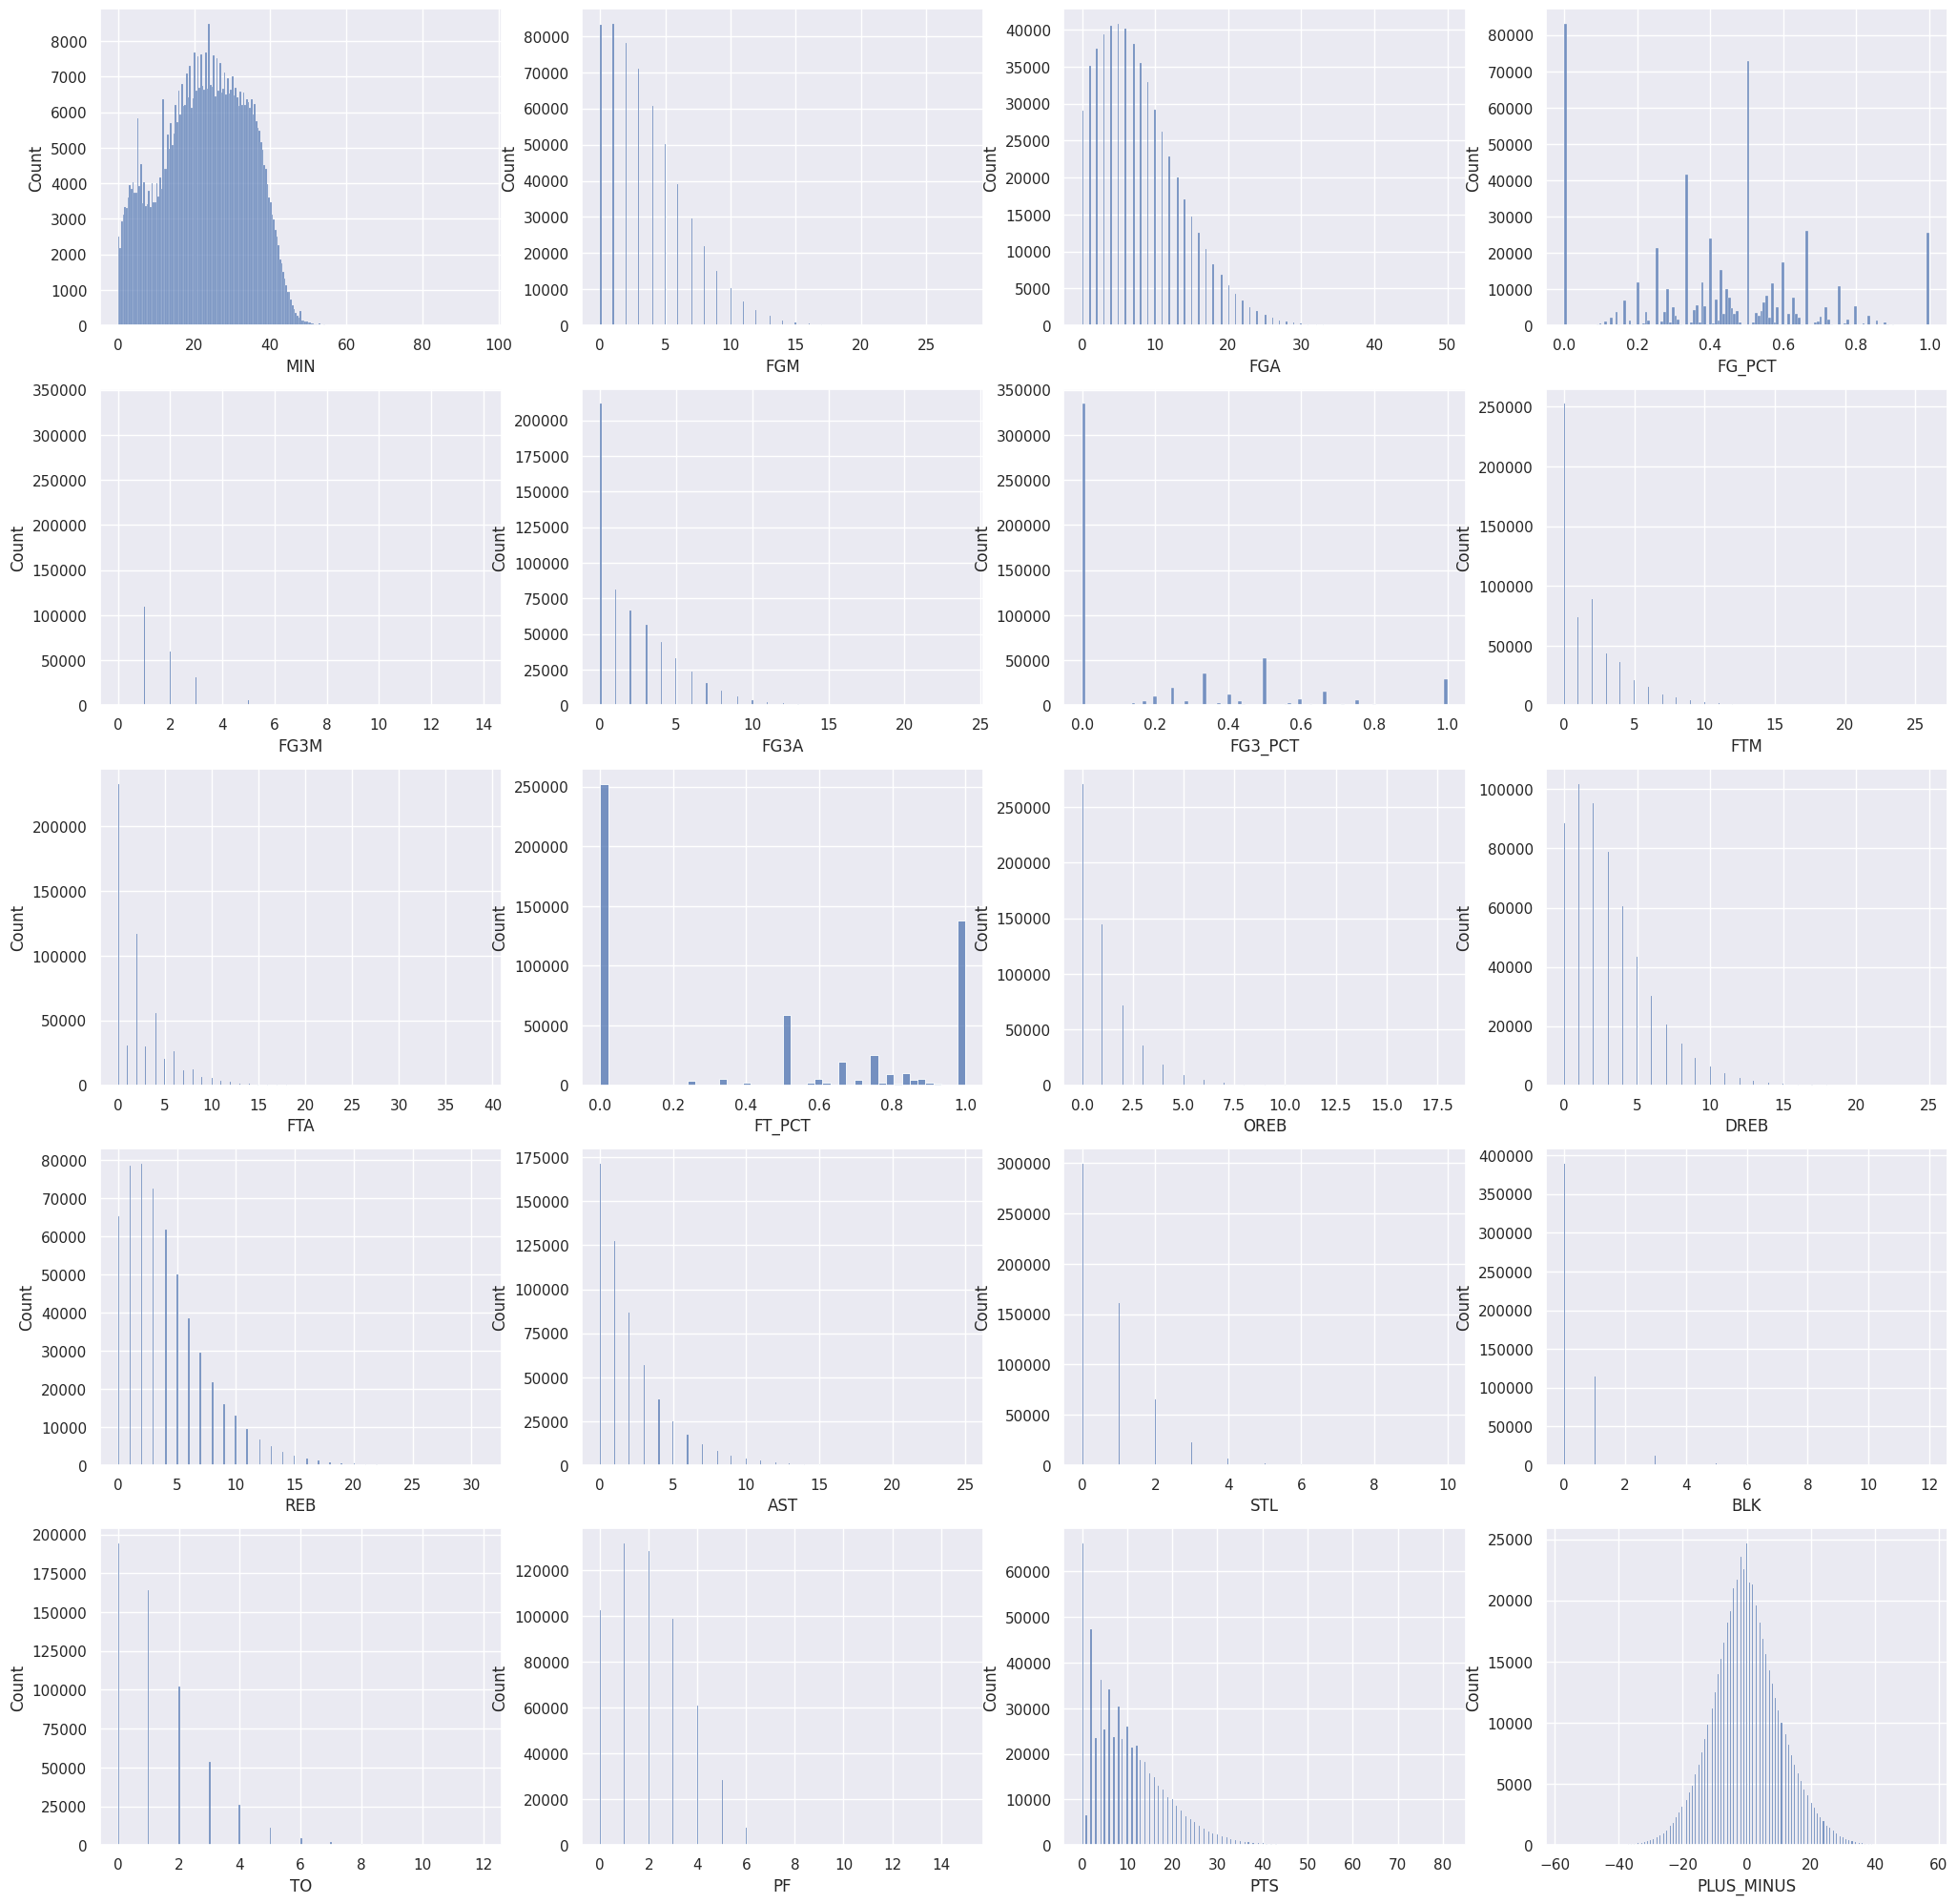

In [66]:
value_list = details.select_dtypes(include=['float']).columns.to_list()

df = details[details['MIN'].notna()]

sns.set(rc={'figure.figsize':(25,25)})
for i, column in enumerate(value_list, 1):
    plt.subplot(5,4,i)
    ax=sns.histplot(x=column, data=df, stat='count')

### check outliers 

**96 minutes in one game**

In [67]:
#list games where players played more than 60 minutes
df.loc[df['MIN'] > 60]

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
124836,20800575,1610612744,GSW,Golden State,2037,Jamal Crawford,NaN,G,NaN,60.100000,13.0,31.0,0.419,1.0,5.0,0.200,8.0,10.0,0.800,1.0,3.0,4.0,4.0,0.0,1.0,3.0,0.0,35.0,1.0
206860,10600102,1610612744,GSW,Golden State,101194,Anthony Roberson,NaN,NaN,NaN,78.000000,8.0,16.0,0.500,3.0,7.0,0.429,1.0,2.0,0.500,0.0,3.0,3.0,1.0,2.0,0.0,1.0,1.0,20.0,NaN
206864,10600102,1610612744,GSW,Golden State,2693,Keith McLeod,NaN,NaN,NaN,86.000000,1.0,3.0,0.333,0.0,0.0,0.000,0.0,0.0,0.000,0.0,1.0,1.0,2.0,4.0,0.0,4.0,4.0,2.0,NaN
206865,10600102,1610612744,GSW,Golden State,2440,Matt Barnes,NaN,NaN,NaN,96.000000,5.0,8.0,0.625,0.0,0.0,0.000,0.0,0.0,0.000,2.0,5.0,7.0,1.0,1.0,1.0,1.0,4.0,10.0,NaN
208638,10600027,1610612766,CHA,Charlotte,101207,Kevin Burleson,NaN,NaN,NaN,62.000000,0.0,3.0,0.000,0.0,2.0,0.000,4.0,4.0,1.000,0.0,0.0,0.0,1.0,1.0,0.0,2.0,5.0,4.0,NaN
208639,10600027,1610612766,CHA,Charlotte,2679,Matt Carroll,NaN,NaN,NaN,93.000000,5.0,8.0,0.625,1.0,3.0,0.333,2.0,2.0,1.000,0.0,2.0,2.0,1.0,0.0,0.0,1.0,4.0,13.0,NaN
208640,10600027,1610612766,CHA,Charlotte,2056,Primoz Brezec,NaN,NaN,NaN,92.000000,0.0,3.0,0.000,0.0,0.0,0.000,6.0,8.0,0.750,1.0,1.0,2.0,1.0,1.0,1.0,0.0,2.0,6.0,NaN
208641,10600027,1610612766,CHA,Charlotte,101109,Raymond Felton,NaN,NaN,NaN,79.000000,5.0,11.0,0.455,3.0,3.0,1.000,7.0,8.0,0.875,2.0,4.0,6.0,5.0,2.0,1.0,5.0,1.0,20.0,NaN
208642,10600027,1610612766,CHA,Charlotte,200797,Ryan Hollins,NaN,NaN,NaN,84.000000,3.0,5.0,0.600,0.0,0.0,0.000,4.0,5.0,0.800,2.0,0.0,2.0,0.0,0.0,1.0,1.0,1.0,10.0,NaN
208644,10600027,1610612766,CHA,Charlotte,200835,Walter Herrmann,NaN,NaN,NaN,72.000000,0.0,3.0,0.000,0.0,3.0,0.000,0.0,0.0,0.000,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


**field goal attempts**

In [68]:
df.loc[df['FGA'] > 40]

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
159472,20700553,1610612747,LAL,Los Angeles,977,Kobe Bryant,NaN,G,NaN,42.200000,21.0,44.0,0.477,2.0,8.0,0.250,4.0,7.0,0.571,0.0,2.0,2.0,2.0,1.0,0.0,1.0,1.0,48.0,-3.0
180462,20601081,1610612747,LAL,Los Angeles,977,Kobe Bryant,NaN,G,NaN,47.566667,19.0,44.0,0.432,3.0,9.0,0.333,12.0,14.0,0.857,1.0,1.0,2.0,2.0,0.0,0.0,3.0,2.0,53.0,1.0
196017,20600431,1610612747,LAL,Los Angeles,977,Kobe Bryant,NaN,G,NaN,54.466667,22.0,45.0,0.489,4.0,11.0,0.364,10.0,12.0,0.833,0.0,5.0,5.0,4.0,0.0,0.0,4.0,6.0,58.0,5.0
226714,20500591,1610612747,LAL,Los Angeles,977,Kobe Bryant,NaN,G,NaN,41.933333,28.0,46.0,0.609,7.0,13.0,0.538,18.0,20.0,0.900,2.0,4.0,6.0,2.0,3.0,1.0,3.0,1.0,81.0,25.0
229210,20500480,1610612747,LAL,Los Angeles,977,Kobe Bryant,NaN,G,NaN,45.350000,17.0,41.0,0.415,7.0,15.0,0.467,9.0,10.0,0.900,3.0,5.0,8.0,8.0,1.0,0.0,3.0,2.0,50.0,9.0
406490,21900179,1610612745,HOU,Houston,201935,James Harden,NaN,G,NaN,38.683333,16.0,41.0,0.390,8.0,22.0,0.364,9.0,11.0,0.818,1.0,5.0,6.0,6.0,0.0,0.0,5.0,4.0,49.0,16.0
449999,41700176,1610612760,OKC,Oklahoma City,201566,Russell Westbrook,NaN,G,NaN,43.800000,18.0,43.0,0.419,7.0,19.0,0.368,3.0,6.0,0.500,1.0,9.0,10.0,5.0,2.0,0.0,5.0,3.0,46.0,-1.0
486326,41600162,1610612760,OKC,Oklahoma City,201566,Russell Westbrook,NaN,G,NaN,41.366667,17.0,43.0,0.395,2.0,11.0,0.182,15.0,18.0,0.833,2.0,8.0,10.0,13.0,4.0,1.0,4.0,3.0,51.0,11.0
517770,21600021,1610612760,OKC,Oklahoma City,201566,Russell Westbrook,NaN,G,NaN,45.316667,17.0,44.0,0.386,2.0,10.0,0.200,15.0,20.0,0.750,3.0,10.0,13.0,10.0,2.0,0.0,5.0,3.0,51.0,7.0
523966,21501228,1610612747,LAL,Los Angeles,977,Kobe Bryant,NaN,F,NaN,42.150000,22.0,50.0,0.440,6.0,21.0,0.286,10.0,12.0,0.833,0.0,4.0,4.0,4.0,1.0,1.0,2.0,1.0,60.0,7.0


NOTE - according to a google search, the 50 FGA by Kobe Bryant is correct

**free throw attempts**

In [69]:
df.loc[df['FTA'] > 30]

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
330604,21100158,1610612753,ORL,Orlando,2730,Dwight Howard,NaN,C,NaN,43.616667,12.0,21.0,0.571,0.0,0.0,0.0,21.0,39.0,0.538,7.0,16.0,23.0,3.0,4.0,2.0,3.0,2.0,45.0,12.0
538914,21500635,1610612765,DET,Detroit,203083,Andre Drummond,NaN,C,NaN,23.216667,2.0,4.0,0.500,0.0,0.0,0.0,13.0,36.0,0.361,5.0,6.0,11.0,2.0,1.0,1.0,2.0,2.0,17.0,10.0
548765,21500261,1610612746,LAC,LA,201599,DeAndre Jordan,NaN,C,NaN,33.016667,3.0,6.0,0.500,0.0,0.0,0.0,12.0,34.0,0.353,9.0,15.0,24.0,1.0,1.0,2.0,0.0,4.0,18.0,21.0
559521,41400234,1610612746,LAC,Los Angeles,201599,DeAndre Jordan,NaN,C,NaN,29.950000,6.0,7.0,0.857,0.0,0.0,0.0,14.0,34.0,0.412,4.0,13.0,17.0,2.0,2.0,1.0,0.0,3.0,26.0,16.0
641659,21200949,1610612747,LAL,Los Angeles,2730,Dwight Howard,NaN,C,NaN,38.400000,7.0,13.0,0.538,0.0,0.0,0.0,25.0,39.0,0.641,3.0,13.0,16.0,2.0,1.0,3.0,0.0,3.0,39.0,16.0


NOTE - according to a google search, the 39 FTA by Dwight Howard are correct